In [124]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.pyplot import figure

In [31]:
df = pd.read_csv("C:\\Users\\OvaizAli\\Desktop\\FYP-2021\\FYP-I\\Master\\Data Collection\\CollectedData\\Final_Data (2022).csv", index_col = False)
# df = df.drop(columns = ['Unnamed: 0'])

In [32]:
df.head()

,Unnamed: 0,Province,Country_Region,Date,Day,Month,Year,Lat,Long_,Confirmed,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,Temp,Wind,Barometer,Visibility,Weather
0,0,Balochistan,Pakistan,2020-03-10,10,3,2020,28.328492,65.898403,1.0,...,0.0,0.0,25.615120,44.61881,10.791250,46.29,15.00,31.43,0.00,Haze.
1,1,Islamabad,Pakistan,2020-03-10,10,3,2020,33.665087,73.121219,2.0,...,0.0,0.0,0.004133,0.00000,0.000000,65.14,9.57,34.71,21.33,Clear.
2,2,Punjab,Pakistan,2020-03-10,10,3,2020,30.811346,72.139132,0.0,...,0.0,0.0,40.904370,89.53674,11.384460,56.40,2.44,23.67,11.88,Clear.
3,3,Sindh,Pakistan,2020-03-10,10,3,2020,26.009446,68.776807,0.0,...,0.0,0.0,22.339800,81.02134,6.179772,65.14,9.57,34.71,21.33,Clear.
4,4,Khyber Pakhtunkhwa,Pakistan,2020-03-10,10,3,2020,34.485332,72.091690,0.0,...,0.0,0.0,17.376130,39.58196,5.953569,48.80,4.64,49.20,23.21,Fog.


In [78]:
x = df[['Date', 'Confirmed', 'Deaths', 'Recovered']]

In [80]:
x.head()

,Date,Confirmed,Deaths,Recovered
0,10/03/20,1.0,0.0,1
1,10/03/20,2.0,0.0,2
2,10/03/20,0.0,0.0,0
3,10/03/20,0.0,0.0,0
4,10/03/20,0.0,0.0,0


In [81]:
# dates = np.array(x['Date'])
# dates = [datetime.strptime(date, '%y%y%y%y-%m-%d').date() for date in dates] 
# dates = [x.strftime('%d/%m/%y') for x in dates]
# dates
x['Date'] = pd.to_datetime(x['Date'])
x['Date'] = x['Date'].dt.strftime('%d/%m/%y')

In [82]:
x.head()

,Date,Confirmed,Deaths,Recovered
0,03/10/20,1.0,0.0,1
1,03/10/20,2.0,0.0,2
2,03/10/20,0.0,0.0,0
3,03/10/20,0.0,0.0,0
4,03/10/20,0.0,0.0,0


In [83]:
dates = x['Date'].unique()

In [84]:
x = x.groupby(by=["Date"]).sum()

In [85]:
x.head()

,Confirmed,Deaths,Recovered
Date,,,
01/01/21,482178.0,10176.0,437229
01/01/22,1295933.0,28933.0,1191105
01/02/21,484362.0,10258.0,438974
01/02/22,1296527.0,28941.0,1191651
01/03/21,486634.0,10311.0,440660


In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
poly_reg = PolynomialFeatures(degree = 6)

In [88]:
input_data_simple = np.arange(0,len(x)) + 1

In [90]:
input_data = poly_reg.fit_transform(input_data_simple.reshape(-1,1))

In [92]:
inputData_dates = pd.Series(dates, index = input_data_simple)

In [93]:
inputData_dates = pd.Series(dates, index = input_data_simple)

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scx = StandardScaler()
input_data_scaled = scx.fit_transform(input_data[:,1:])

In [97]:
class annModel:
    def __init__(self, X_data, Y_data, hidden_neurons = 200, activation = 'relu', lear_rate = 1e-1):
        self.X_data = X_data
        self.Y_data = Y_data
        self.training = False
        input_samples, input_shape = self.X_data.shape
        try:
            output_samples, output_shape = self.Y_data.shape
        except:
            output_shape = 1
            
        self.annDesign = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.Dense(hidden_neurons, activation=activation),
            tf.keras.layers.Dense(output_shape),
        ])
        compiler = self.annDesign.compile(optimizer = tf.keras.optimizers.Adam(lear_rate), loss='mse', metrics=['MeanAbsoluteError'])
    def customize(self):
        return self.annDesign
    def summary(self):
        return self.annDesign.summary()
    def fit(self, epochs = 500):
        fitting = self.annDesign.fit(self.X_data, self.Y_data, epochs = epochs)
        self.training = True
        return fitting
    def predict(self, prediction_data):
        if self.training:
            predictions = self.annDesign.predict(prediction_data)
            return predictions
        else:
            print("Neural network model is not trained. Please use fit method to train model")

In [98]:
from sklearn.model_selection import train_test_split

In [112]:
confirmed_pk = np.array(x['Confirmed'])
deaths_pk = np.array(x['Deaths'])
recovered_pk = np.array(x['Recovered'])

In [115]:
conf_death_recov = np.concatenate((confirmed_pk.reshape(-1,1), deaths_pk.reshape(-1,1), recovered_pk.reshape(-1,1)), axis = 1)

In [116]:
dates_train, dates_test = train_test_split(dates, test_size=0.05, shuffle=False)
input_train, input_test, output_train, output_test = train_test_split(input_data_scaled, conf_death_recov, 
                                                                                  test_size=0.05, shuffle=False)

In [118]:
input_train_tf = tf.convert_to_tensor(np.array(input_train), dtype=tf.float32)
input_test_tf = tf.convert_to_tensor(np.array(input_test), dtype=tf.float32)
output_train_tf = tf.convert_to_tensor(np.array(output_train), dtype=tf.float32)
output_test_tf = tf.convert_to_tensor(np.array(output_test), dtype=tf.float32)

In [119]:
ann_model_for_evaluation = annModel(input_train_tf, output_train_tf)

In [120]:
ann_model_for_evaluation.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [121]:
best_epochs = 4000

In [122]:
fitting_amfe = ann_model_for_evaluation.fit(best_epochs)

Epoch 1/4000
21/21 [==============================] - 2s 7ms/step - loss: 396403539968.0000 - mean_absolute_error: 428756.0938
Epoch 2/4000
21/21 [==============================] - 0s 3ms/step - loss: 391850622976.0000 - mean_absolute_error: 424545.1875
Epoch 3/4000
21/21 [==============================] - 0s 3ms/step - loss: 380413771776.0000 - mean_absolute_error: 416495.5312
Epoch 4/4000
21/21 [==============================] - 0s 3ms/step - loss: 360666103808.0000 - mean_absolute_error: 403430.4375
Epoch 5/4000
21/21 [==============================] - 0s 3ms/step - loss: 334323384320.0000 - mean_absolute_error: 385124.3750
Epoch 6/4000
21/21 [==============================] - 0s 2ms/step - loss: 303064317952.0000 - mean_absolute_error: 364714.7812
Epoch 7/4000
21/21 [==============================] - 0s 2ms/step - loss: 270336884736.0000 - mean_absolute_error: 341886.5000
Epoch 8/4000
21/21 [==============================] - 0s 2ms/step - loss: 239068790784.0000 - mean_absolute_err

21/21 [==============================] - 0s 2ms/step - loss: 126386405376.0000 - mean_absolute_error: 261385.9531
Epoch 65/4000
21/21 [==============================] - 0s 2ms/step - loss: 126576525312.0000 - mean_absolute_error: 261304.4688
Epoch 66/4000
21/21 [==============================] - 0s 2ms/step - loss: 126447976448.0000 - mean_absolute_error: 261674.1719
Epoch 67/4000
21/21 [==============================] - ETA: 0s - loss: 132196417536.0000 - mean_absolute_error: 284556.187 - 0s 2ms/step - loss: 126316175360.0000 - mean_absolute_error: 261280.2188
Epoch 68/4000
21/21 [==============================] - 0s 2ms/step - loss: 126337425408.0000 - mean_absolute_error: 261273.6875
Epoch 69/4000
21/21 [==============================] - 0s 2ms/step - loss: 126249844736.0000 - mean_absolute_error: 261295.5625
Epoch 70/4000
21/21 [==============================] - 0s 2ms/step - loss: 126260035584.0000 - mean_absolute_error: 261406.2188
Epoch 71/4000
21/21 [===========================

21/21 [==============================] - 0s 2ms/step - loss: 125678755840.0000 - mean_absolute_error: 261385.3281
Epoch 128/4000
21/21 [==============================] - 0s 2ms/step - loss: 125672652800.0000 - mean_absolute_error: 261034.2969
Epoch 129/4000
21/21 [==============================] - 0s 2ms/step - loss: 125586415616.0000 - mean_absolute_error: 261116.8125
Epoch 130/4000
21/21 [==============================] - 0s 2ms/step - loss: 125606641664.0000 - mean_absolute_error: 260954.8906
Epoch 131/4000
21/21 [==============================] - 0s 2ms/step - loss: 125577478144.0000 - mean_absolute_error: 260784.9844
Epoch 132/4000
21/21 [==============================] - 0s 2ms/step - loss: 125758717952.0000 - mean_absolute_error: 261357.4844
Epoch 133/4000
21/21 [==============================] - 0s 2ms/step - loss: 125696974848.0000 - mean_absolute_error: 261354.2656
Epoch 134/4000
21/21 [==============================] - 0s 2ms/step - loss: 125520674816.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 125206749184.0000 - mean_absolute_error: 260989.5938
Epoch 191/4000
21/21 [==============================] - 0s 2ms/step - loss: 125267369984.0000 - mean_absolute_error: 261243.2500
Epoch 192/4000
21/21 [==============================] - 0s 2ms/step - loss: 125222862848.0000 - mean_absolute_error: 261173.1875
Epoch 193/4000
21/21 [==============================] - 0s 956us/step - loss: 125287202816.0000 - mean_absolute_error: 261037.2344
Epoch 194/4000
21/21 [==============================] - 0s 1ms/step - loss: 125145391104.0000 - mean_absolute_error: 260978.3438
Epoch 195/4000
21/21 [==============================] - 0s 2ms/step - loss: 125194100736.0000 - mean_absolute_error: 261130.8594
Epoch 196/4000
21/21 [==============================] - 0s 2ms/step - loss: 125140688896.0000 - mean_absolute_error: 261022.3750
Epoch 197/4000
21/21 [==============================] - 0s 2ms/step - loss: 125143416832.0000 - mean_absolute_

21/21 [==============================] - 0s 2ms/step - loss: 125088178176.0000 - mean_absolute_error: 261107.9062
Epoch 254/4000
21/21 [==============================] - 0s 3ms/step - loss: 125103939584.0000 - mean_absolute_error: 261037.6719
Epoch 255/4000
21/21 [==============================] - 0s 3ms/step - loss: 125125115904.0000 - mean_absolute_error: 260936.5156
Epoch 256/4000
21/21 [==============================] - 0s 2ms/step - loss: 125139697664.0000 - mean_absolute_error: 261300.3125
Epoch 257/4000
21/21 [==============================] - 0s 2ms/step - loss: 125124083712.0000 - mean_absolute_error: 261159.7500
Epoch 258/4000
21/21 [==============================] - 0s 2ms/step - loss: 125097107456.0000 - mean_absolute_error: 261334.7656
Epoch 259/4000
21/21 [==============================] - 0s 2ms/step - loss: 125022691328.0000 - mean_absolute_error: 261318.3281
Epoch 260/4000
21/21 [==============================] - 0s 2ms/step - loss: 125033758720.0000 - mean_absolute_er

21/21 [==============================] - 0s 1ms/step - loss: 124981796864.0000 - mean_absolute_error: 261090.7344
Epoch 317/4000
21/21 [==============================] - 0s 1ms/step - loss: 124945514496.0000 - mean_absolute_error: 261187.0938
Epoch 318/4000
21/21 [==============================] - 0s 2ms/step - loss: 125043417088.0000 - mean_absolute_error: 261371.2031
Epoch 319/4000
21/21 [==============================] - 0s 810us/step - loss: 125008969728.0000 - mean_absolute_error: 261334.5000
Epoch 320/4000
21/21 [==============================] - 0s 1ms/step - loss: 125015588864.0000 - mean_absolute_error: 261205.6094
Epoch 321/4000
21/21 [==============================] - 0s 2ms/step - loss: 125043146752.0000 - mean_absolute_error: 261369.3750
Epoch 322/4000
21/21 [==============================] - 0s 2ms/step - loss: 124958908416.0000 - mean_absolute_error: 261109.4219
Epoch 323/4000
21/21 [==============================] - 0s 2ms/step - loss: 125199933440.0000 - mean_absolute_

21/21 [==============================] - 0s 1ms/step - loss: 124963545088.0000 - mean_absolute_error: 261405.8906
Epoch 380/4000
21/21 [==============================] - 0s 1ms/step - loss: 124958228480.0000 - mean_absolute_error: 261081.4688
Epoch 381/4000
21/21 [==============================] - ETA: 0s - loss: 161423654912.0000 - mean_absolute_error: 304649.187 - 0s 692us/step - loss: 124929187840.0000 - mean_absolute_error: 261093.0156
Epoch 382/4000
21/21 [==============================] - 0s 829us/step - loss: 124997894144.0000 - mean_absolute_error: 261135.9219
Epoch 383/4000
21/21 [==============================] - 0s 2ms/step - loss: 124916940800.0000 - mean_absolute_error: 261035.4219
Epoch 384/4000
21/21 [==============================] - 0s 1ms/step - loss: 124898402304.0000 - mean_absolute_error: 261193.0156
Epoch 385/4000
21/21 [==============================] - 0s 2ms/step - loss: 124948127744.0000 - mean_absolute_error: 261340.2344
Epoch 386/4000
21/21 [================

21/21 [==============================] - 0s 2ms/step - loss: 124903604224.0000 - mean_absolute_error: 261292.6250
Epoch 443/4000
21/21 [==============================] - 0s 2ms/step - loss: 125000851456.0000 - mean_absolute_error: 261509.6094
Epoch 444/4000
21/21 [==============================] - 0s 2ms/step - loss: 124880994304.0000 - mean_absolute_error: 261298.8125
Epoch 445/4000
21/21 [==============================] - 0s 3ms/step - loss: 124920307712.0000 - mean_absolute_error: 261464.2500
Epoch 446/4000
21/21 [==============================] - 0s 2ms/step - loss: 124830130176.0000 - mean_absolute_error: 261437.3125
Epoch 447/4000
21/21 [==============================] - 0s 2ms/step - loss: 124801196032.0000 - mean_absolute_error: 261153.1562
Epoch 448/4000
21/21 [==============================] - 0s 2ms/step - loss: 124931727360.0000 - mean_absolute_error: 261067.9688
Epoch 449/4000
21/21 [==============================] - 0s 2ms/step - loss: 124943237120.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 124781158400.0000 - mean_absolute_error: 261245.7031
Epoch 506/4000
21/21 [==============================] - 0s 2ms/step - loss: 124800688128.0000 - mean_absolute_error: 261269.1562
Epoch 507/4000
21/21 [==============================] - 0s 1ms/step - loss: 124819685376.0000 - mean_absolute_error: 261193.6719
Epoch 508/4000
21/21 [==============================] - 0s 2ms/step - loss: 124783263744.0000 - mean_absolute_error: 261067.2812
Epoch 509/4000
21/21 [==============================] - 0s 2ms/step - loss: 124876890112.0000 - mean_absolute_error: 261341.3438
Epoch 510/4000
21/21 [==============================] - 0s 2ms/step - loss: 124887064576.0000 - mean_absolute_error: 261412.8438
Epoch 511/4000
21/21 [==============================] - 0s 2ms/step - loss: 124742950912.0000 - mean_absolute_error: 261189.4688
Epoch 512/4000
21/21 [==============================] - 0s 2ms/step - loss: 124835782656.0000 - mean_absolute_er

21/21 [==============================] - 0s 1ms/step - loss: 124856868864.0000 - mean_absolute_error: 261463.1250
Epoch 569/4000
21/21 [==============================] - 0s 1ms/step - loss: 124768133120.0000 - mean_absolute_error: 261177.7656
Epoch 570/4000
21/21 [==============================] - 0s 1ms/step - loss: 124865724416.0000 - mean_absolute_error: 261143.7031
Epoch 571/4000
21/21 [==============================] - 0s 1ms/step - loss: 124762972160.0000 - mean_absolute_error: 261320.1875
Epoch 572/4000
21/21 [==============================] - 0s 2ms/step - loss: 124723978240.0000 - mean_absolute_error: 261235.8906
Epoch 573/4000
21/21 [==============================] - 0s 1ms/step - loss: 124745392128.0000 - mean_absolute_error: 261133.1875
Epoch 574/4000
21/21 [==============================] - 0s 1ms/step - loss: 124844154880.0000 - mean_absolute_error: 261304.1562
Epoch 575/4000
21/21 [==============================] - 0s 1ms/step - loss: 124718751744.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 124758597632.0000 - mean_absolute_error: 261229.3906
Epoch 632/4000
21/21 [==============================] - 0s 2ms/step - loss: 124742803456.0000 - mean_absolute_error: 261151.0469
Epoch 633/4000
21/21 [==============================] - 0s 1ms/step - loss: 124753289216.0000 - mean_absolute_error: 261160.6094
Epoch 634/4000
21/21 [==============================] - 0s 2ms/step - loss: 124752699392.0000 - mean_absolute_error: 261221.2500
Epoch 635/4000
21/21 [==============================] - 0s 2ms/step - loss: 124700860416.0000 - mean_absolute_error: 261382.3281
Epoch 636/4000
21/21 [==============================] - 0s 1ms/step - loss: 124701237248.0000 - mean_absolute_error: 261391.5625
Epoch 637/4000
21/21 [==============================] - 0s 1ms/step - loss: 124833128448.0000 - mean_absolute_error: 261572.6250
Epoch 638/4000
21/21 [==============================] - 0s 2ms/step - loss: 124638855168.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 124732096512.0000 - mean_absolute_error: 261441.4219
Epoch 695/4000
21/21 [==============================] - 0s 2ms/step - loss: 124645335040.0000 - mean_absolute_error: 261366.5781
Epoch 696/4000
21/21 [==============================] - 0s 1ms/step - loss: 124622929920.0000 - mean_absolute_error: 261282.0312
Epoch 697/4000
21/21 [==============================] - 0s 1ms/step - loss: 124693012480.0000 - mean_absolute_error: 261273.8594
Epoch 698/4000
21/21 [==============================] - 0s 1ms/step - loss: 124759826432.0000 - mean_absolute_error: 261049.7656
Epoch 699/4000
21/21 [==============================] - 0s 2ms/step - loss: 124793634816.0000 - mean_absolute_error: 261366.8438
Epoch 700/4000
21/21 [==============================] - 0s 1ms/step - loss: 124761276416.0000 - mean_absolute_error: 261192.6875
Epoch 701/4000
21/21 [==============================] - 0s 2ms/step - loss: 124687261696.0000 - mean_absolute_er

21/21 [==============================] - 0s 1ms/step - loss: 124662398976.0000 - mean_absolute_error: 261319.1719
Epoch 758/4000
21/21 [==============================] - 0s 1ms/step - loss: 124625018880.0000 - mean_absolute_error: 261226.7969
Epoch 759/4000
21/21 [==============================] - 0s 2ms/step - loss: 124712214528.0000 - mean_absolute_error: 260944.4375
Epoch 760/4000
21/21 [==============================] - 0s 2ms/step - loss: 124677079040.0000 - mean_absolute_error: 261389.4531
Epoch 761/4000
21/21 [==============================] - 0s 2ms/step - loss: 124572901376.0000 - mean_absolute_error: 261429.8125
Epoch 762/4000
21/21 [==============================] - 0s 2ms/step - loss: 124616556544.0000 - mean_absolute_error: 261179.1250
Epoch 763/4000
21/21 [==============================] - 0s 1ms/step - loss: 124744220672.0000 - mean_absolute_error: 261123.7344
Epoch 764/4000
21/21 [==============================] - 0s 2ms/step - loss: 124727320576.0000 - mean_absolute_er

21/21 [==============================] - 0s 1ms/step - loss: 124667068416.0000 - mean_absolute_error: 261450.2656
Epoch 821/4000
21/21 [==============================] - ETA: 0s - loss: 126630535168.0000 - mean_absolute_error: 268145.093 - 0s 1ms/step - loss: 124657885184.0000 - mean_absolute_error: 261357.1406
Epoch 822/4000
21/21 [==============================] - 0s 778us/step - loss: 124547325952.0000 - mean_absolute_error: 261003.8438
Epoch 823/4000
21/21 [==============================] - 0s 1ms/step - loss: 124569862144.0000 - mean_absolute_error: 261129.1875
Epoch 824/4000
21/21 [==============================] - 0s 2ms/step - loss: 124577996800.0000 - mean_absolute_error: 261271.2969
Epoch 825/4000
21/21 [==============================] - 0s 1ms/step - loss: 124624396288.0000 - mean_absolute_error: 261190.1406
Epoch 826/4000
21/21 [==============================] - 0s 2ms/step - loss: 124554706944.0000 - mean_absolute_error: 261467.1562
Epoch 827/4000
21/21 [==================

21/21 [==============================] - 0s 2ms/step - loss: 124536619008.0000 - mean_absolute_error: 261275.5312
Epoch 884/4000
21/21 [==============================] - 0s 1ms/step - loss: 124509716480.0000 - mean_absolute_error: 261209.2344
Epoch 885/4000
21/21 [==============================] - 0s 2ms/step - loss: 124628418560.0000 - mean_absolute_error: 261437.3594
Epoch 886/4000
21/21 [==============================] - 0s 1ms/step - loss: 124526321664.0000 - mean_absolute_error: 261431.2969
Epoch 887/4000
21/21 [==============================] - 0s 2ms/step - loss: 124541083648.0000 - mean_absolute_error: 261063.3906
Epoch 888/4000
21/21 [==============================] - 0s 1ms/step - loss: 124825911296.0000 - mean_absolute_error: 261391.3281
Epoch 889/4000
21/21 [==============================] - 0s 2ms/step - loss: 124693995520.0000 - mean_absolute_error: 261096.2969
Epoch 890/4000
21/21 [==============================] - 0s 2ms/step - loss: 124712288256.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 124459573248.0000 - mean_absolute_error: 261390.9375
Epoch 947/4000
21/21 [==============================] - 0s 2ms/step - loss: 124554338304.0000 - mean_absolute_error: 261475.7969
Epoch 948/4000
21/21 [==============================] - 0s 2ms/step - loss: 124652437504.0000 - mean_absolute_error: 261136.1719
Epoch 949/4000
21/21 [==============================] - 0s 2ms/step - loss: 124416188416.0000 - mean_absolute_error: 261071.3750
Epoch 950/4000
21/21 [==============================] - 0s 2ms/step - loss: 124497567744.0000 - mean_absolute_error: 261528.3750
Epoch 951/4000
21/21 [==============================] - 0s 2ms/step - loss: 124518285312.0000 - mean_absolute_error: 261521.1562
Epoch 952/4000
21/21 [==============================] - 0s 2ms/step - loss: 124624101376.0000 - mean_absolute_error: 261522.2969
Epoch 953/4000
21/21 [==============================] - 0s 2ms/step - loss: 124450660352.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 124439052288.0000 - mean_absolute_error: 261283.7656
Epoch 1010/4000
21/21 [==============================] - 0s 2ms/step - loss: 124609224704.0000 - mean_absolute_error: 261639.2188
Epoch 1011/4000
21/21 [==============================] - 0s 2ms/step - loss: 124621307904.0000 - mean_absolute_error: 261497.4531
Epoch 1012/4000
21/21 [==============================] - ETA: 0s - loss: 118083567616.0000 - mean_absolute_error: 244334.312 - 0s 1ms/step - loss: 124478251008.0000 - mean_absolute_error: 261338.7031
Epoch 1013/4000
21/21 [==============================] - 0s 2ms/step - loss: 124849864704.0000 - mean_absolute_error: 261697.2500
Epoch 1014/4000
21/21 [==============================] - 0s 2ms/step - loss: 124441616384.0000 - mean_absolute_error: 261296.9531
Epoch 1015/4000
21/21 [==============================] - 0s 1ms/step - loss: 124477513728.0000 - mean_absolute_error: 261206.4062
Epoch 1016/4000
21/21 [=============

21/21 [==============================] - 0s 2ms/step - loss: 124431294464.0000 - mean_absolute_error: 261298.4531
Epoch 1072/4000
21/21 [==============================] - 0s 2ms/step - loss: 124425003008.0000 - mean_absolute_error: 261112.2344
Epoch 1073/4000
21/21 [==============================] - 0s 2ms/step - loss: 124386115584.0000 - mean_absolute_error: 261350.6406
Epoch 1074/4000
21/21 [==============================] - 0s 1ms/step - loss: 124413607936.0000 - mean_absolute_error: 261196.2031
Epoch 1075/4000
21/21 [==============================] - 0s 2ms/step - loss: 124506914816.0000 - mean_absolute_error: 261639.0938
Epoch 1076/4000
21/21 [==============================] - 0s 2ms/step - loss: 124378710016.0000 - mean_absolute_error: 261394.3438
Epoch 1077/4000
21/21 [==============================] - 0s 2ms/step - loss: 124383600640.0000 - mean_absolute_error: 261206.8594
Epoch 1078/4000
21/21 [==============================] - 0s 2ms/step - loss: 124394831872.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 124379725824.0000 - mean_absolute_error: 261196.9062
Epoch 1135/4000
21/21 [==============================] - 0s 2ms/step - loss: 124361981952.0000 - mean_absolute_error: 261132.2812
Epoch 1136/4000
21/21 [==============================] - 0s 2ms/step - loss: 124424339456.0000 - mean_absolute_error: 261527.5312
Epoch 1137/4000
21/21 [==============================] - 0s 2ms/step - loss: 124331442176.0000 - mean_absolute_error: 261279.6719
Epoch 1138/4000
21/21 [==============================] - 0s 2ms/step - loss: 124348096512.0000 - mean_absolute_error: 261236.7500
Epoch 1139/4000
21/21 [==============================] - 0s 2ms/step - loss: 124325044224.0000 - mean_absolute_error: 261336.1562
Epoch 1140/4000
21/21 [==============================] - 0s 2ms/step - loss: 124440797184.0000 - mean_absolute_error: 261455.2812
Epoch 1141/4000
21/21 [==============================] - 0s 2ms/step - loss: 124307677184.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 124268347392.0000 - mean_absolute_error: 261333.7344
Epoch 1198/4000
21/21 [==============================] - 0s 2ms/step - loss: 124409004032.0000 - mean_absolute_error: 261719.1719
Epoch 1199/4000
21/21 [==============================] - 0s 1ms/step - loss: 124296355840.0000 - mean_absolute_error: 261344.9375
Epoch 1200/4000
21/21 [==============================] - 0s 1ms/step - loss: 124370419712.0000 - mean_absolute_error: 261446.3750
Epoch 1201/4000
21/21 [==============================] - 0s 1ms/step - loss: 124351504384.0000 - mean_absolute_error: 261379.2188
Epoch 1202/4000
21/21 [==============================] - 0s 1ms/step - loss: 124437405696.0000 - mean_absolute_error: 261360.5938
Epoch 1203/4000
21/21 [==============================] - 0s 2ms/step - loss: 124254085120.0000 - mean_absolute_error: 261211.9531
Epoch 1204/4000
21/21 [==============================] - 0s 2ms/step - loss: 124286959616.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 124297781248.0000 - mean_absolute_error: 261194.3438
Epoch 1261/4000
21/21 [==============================] - 0s 2ms/step - loss: 124329926656.0000 - mean_absolute_error: 261583.2969
Epoch 1262/4000
21/21 [==============================] - 0s 1ms/step - loss: 124248662016.0000 - mean_absolute_error: 261190.4219
Epoch 1263/4000
21/21 [==============================] - 0s 2ms/step - loss: 124317949952.0000 - mean_absolute_error: 261431.3438
Epoch 1264/4000
21/21 [==============================] - 0s 2ms/step - loss: 124258729984.0000 - mean_absolute_error: 261225.3281
Epoch 1265/4000
21/21 [==============================] - 0s 1ms/step - loss: 124276973568.0000 - mean_absolute_error: 261233.0000
Epoch 1266/4000
21/21 [==============================] - 0s 1ms/step - loss: 124225388544.0000 - mean_absolute_error: 261154.8750
Epoch 1267/4000
21/21 [==============================] - 0s 2ms/step - loss: 124229853184.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 124168011776.0000 - mean_absolute_error: 261191.8906
Epoch 1324/4000
21/21 [==============================] - 0s 2ms/step - loss: 124165480448.0000 - mean_absolute_error: 261342.8281
Epoch 1325/4000
21/21 [==============================] - 0s 1ms/step - loss: 124167356416.0000 - mean_absolute_error: 261217.3906
Epoch 1326/4000
21/21 [==============================] - 0s 2ms/step - loss: 124168314880.0000 - mean_absolute_error: 261172.1094
Epoch 1327/4000
21/21 [==============================] - 0s 2ms/step - loss: 124148064256.0000 - mean_absolute_error: 261074.7344
Epoch 1328/4000
21/21 [==============================] - 0s 2ms/step - loss: 124230164480.0000 - mean_absolute_error: 261277.7500
Epoch 1329/4000
21/21 [==============================] - 0s 2ms/step - loss: 124225830912.0000 - mean_absolute_error: 261405.7188
Epoch 1330/4000
21/21 [==============================] - 0s 2ms/step - loss: 124324716544.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 124300025856.0000 - mean_absolute_error: 261483.2188
Epoch 1386/4000
21/21 [==============================] - 0s 2ms/step - loss: 124208594944.0000 - mean_absolute_error: 261559.6094
Epoch 1387/4000
21/21 [==============================] - 0s 2ms/step - loss: 124241625088.0000 - mean_absolute_error: 261537.4688
Epoch 1388/4000
21/21 [==============================] - 0s 2ms/step - loss: 124199616512.0000 - mean_absolute_error: 261292.5625
Epoch 1389/4000
21/21 [==============================] - 0s 2ms/step - loss: 124227272704.0000 - mean_absolute_error: 261152.6406
Epoch 1390/4000
21/21 [==============================] - 0s 2ms/step - loss: 124345720832.0000 - mean_absolute_error: 261811.3281
Epoch 1391/4000
21/21 [==============================] - 0s 3ms/step - loss: 124136341504.0000 - mean_absolute_error: 261405.6719
Epoch 1392/4000
21/21 [==============================] - 0s 3ms/step - loss: 124283904000.0000 - mean_abso

21/21 [==============================] - 0s 1ms/step - loss: 124063195136.0000 - mean_absolute_error: 261397.0781
Epoch 1449/4000
21/21 [==============================] - 0s 2ms/step - loss: 124051374080.0000 - mean_absolute_error: 261200.8594
Epoch 1450/4000
21/21 [==============================] - 0s 2ms/step - loss: 124125691904.0000 - mean_absolute_error: 261307.4844
Epoch 1451/4000
21/21 [==============================] - 0s 2ms/step - loss: 124113543168.0000 - mean_absolute_error: 261424.6250
Epoch 1452/4000
21/21 [==============================] - 0s 1ms/step - loss: 124289687552.0000 - mean_absolute_error: 261274.1406
Epoch 1453/4000
21/21 [==============================] - 0s 2ms/step - loss: 124074557440.0000 - mean_absolute_error: 261273.5469
Epoch 1454/4000
21/21 [==============================] - 0s 2ms/step - loss: 124037505024.0000 - mean_absolute_error: 261209.8906
Epoch 1455/4000
21/21 [==============================] - 0s 2ms/step - loss: 124327510016.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123998281728.0000 - mean_absolute_error: 261326.2188
Epoch 1512/4000
21/21 [==============================] - 0s 2ms/step - loss: 124204130304.0000 - mean_absolute_error: 261568.4062
Epoch 1513/4000
21/21 [==============================] - 0s 2ms/step - loss: 124163432448.0000 - mean_absolute_error: 261652.3906
Epoch 1514/4000
21/21 [==============================] - 0s 1ms/step - loss: 124051234816.0000 - mean_absolute_error: 261351.6094
Epoch 1515/4000
21/21 [==============================] - 0s 1ms/step - loss: 124005834752.0000 - mean_absolute_error: 261232.5938
Epoch 1516/4000
21/21 [==============================] - 0s 2ms/step - loss: 124060467200.0000 - mean_absolute_error: 261162.2188
Epoch 1517/4000
21/21 [==============================] - 0s 2ms/step - loss: 124056215552.0000 - mean_absolute_error: 261208.9688
Epoch 1518/4000
21/21 [==============================] - 0s 1ms/step - loss: 124017909760.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123952791552.0000 - mean_absolute_error: 261251.8438
Epoch 1574/4000
21/21 [==============================] - 0s 2ms/step - loss: 124093882368.0000 - mean_absolute_error: 261421.9844
Epoch 1575/4000
21/21 [==============================] - 0s 2ms/step - loss: 123994062848.0000 - mean_absolute_error: 261055.9688
Epoch 1576/4000
21/21 [==============================] - 0s 2ms/step - loss: 123966472192.0000 - mean_absolute_error: 261202.8750
Epoch 1577/4000
21/21 [==============================] - ETA: 0s - loss: 111984902144.0000 - mean_absolute_error: 246712.968 - 0s 2ms/step - loss: 123953029120.0000 - mean_absolute_error: 261300.4688
Epoch 1578/4000
21/21 [==============================] - 0s 2ms/step - loss: 123956887552.0000 - mean_absolute_error: 261256.7812
Epoch 1579/4000
21/21 [==============================] - 0s 2ms/step - loss: 123955855360.0000 - mean_absolute_error: 261399.0938
Epoch 1580/4000
21/21 [=============

21/21 [==============================] - 0s 2ms/step - loss: 124002172928.0000 - mean_absolute_error: 261550.2969
Epoch 1636/4000
21/21 [==============================] - 0s 2ms/step - loss: 124174376960.0000 - mean_absolute_error: 261147.4844
Epoch 1637/4000
21/21 [==============================] - 0s 2ms/step - loss: 124092014592.0000 - mean_absolute_error: 261460.8438
Epoch 1638/4000
21/21 [==============================] - 0s 2ms/step - loss: 123929600000.0000 - mean_absolute_error: 261307.2969
Epoch 1639/4000
21/21 [==============================] - 0s 2ms/step - loss: 123958632448.0000 - mean_absolute_error: 261418.5781
Epoch 1640/4000
21/21 [==============================] - 0s 2ms/step - loss: 123953438720.0000 - mean_absolute_error: 261143.5156
Epoch 1641/4000
21/21 [==============================] - 0s 2ms/step - loss: 124093882368.0000 - mean_absolute_error: 261568.7188
Epoch 1642/4000
21/21 [==============================] - 0s 2ms/step - loss: 123874828288.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123926740992.0000 - mean_absolute_error: 261396.6562
Epoch 1698/4000
21/21 [==============================] - 0s 1ms/step - loss: 123864334336.0000 - mean_absolute_error: 261213.4531
Epoch 1699/4000
21/21 [==============================] - 0s 2ms/step - loss: 124069838848.0000 - mean_absolute_error: 261165.5312
Epoch 1700/4000
21/21 [==============================] - 0s 2ms/step - loss: 123873828864.0000 - mean_absolute_error: 261394.6875
Epoch 1701/4000
21/21 [==============================] - 0s 2ms/step - loss: 123986984960.0000 - mean_absolute_error: 261447.4062
Epoch 1702/4000
21/21 [==============================] - 0s 2ms/step - loss: 123841511424.0000 - mean_absolute_error: 261272.3750
Epoch 1703/4000
21/21 [==============================] - 0s 2ms/step - loss: 123951734784.0000 - mean_absolute_error: 261226.9375
Epoch 1704/4000
21/21 [==============================] - 0s 2ms/step - loss: 123869519872.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123811463168.0000 - mean_absolute_error: 261227.3438
Epoch 1760/4000
21/21 [==============================] - 0s 1ms/step - loss: 123796226048.0000 - mean_absolute_error: 261299.5781
Epoch 1761/4000
21/21 [==============================] - 0s 1ms/step - loss: 123851292672.0000 - mean_absolute_error: 261186.3281
Epoch 1762/4000
21/21 [==============================] - 0s 1ms/step - loss: 123867602944.0000 - mean_absolute_error: 261190.9062
Epoch 1763/4000
21/21 [==============================] - 0s 1ms/step - loss: 123794120704.0000 - mean_absolute_error: 261220.9375
Epoch 1764/4000
21/21 [==============================] - 0s 2ms/step - loss: 123824128000.0000 - mean_absolute_error: 261373.7969
Epoch 1765/4000
21/21 [==============================] - 0s 1ms/step - loss: 123872313344.0000 - mean_absolute_error: 261403.1562
Epoch 1766/4000
21/21 [==============================] - 0s 1ms/step - loss: 123854397440.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123862171648.0000 - mean_absolute_error: 261451.5938
Epoch 1823/4000
21/21 [==============================] - 0s 2ms/step - loss: 123807416320.0000 - mean_absolute_error: 261311.4062
Epoch 1824/4000
21/21 [==============================] - 0s 2ms/step - loss: 123847786496.0000 - mean_absolute_error: 261105.1719
Epoch 1825/4000
21/21 [==============================] - 0s 2ms/step - loss: 123929272320.0000 - mean_absolute_error: 261065.5938
Epoch 1826/4000
21/21 [==============================] - 0s 2ms/step - loss: 123838193664.0000 - mean_absolute_error: 261541.3750
Epoch 1827/4000
21/21 [==============================] - 0s 3ms/step - loss: 123816255488.0000 - mean_absolute_error: 261634.9531
Epoch 1828/4000
21/21 [==============================] - 0s 2ms/step - loss: 123799142400.0000 - mean_absolute_error: 261301.4219
Epoch 1829/4000
21/21 [==============================] - 0s 2ms/step - loss: 123727429632.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123697586176.0000 - mean_absolute_error: 261282.3438
Epoch 1885/4000
21/21 [==============================] - 0s 2ms/step - loss: 123875917824.0000 - mean_absolute_error: 261573.7500
Epoch 1886/4000
21/21 [==============================] - 0s 2ms/step - loss: 123787681792.0000 - mean_absolute_error: 261066.1406
Epoch 1887/4000
21/21 [==============================] - 0s 2ms/step - loss: 123662245888.0000 - mean_absolute_error: 261130.0312
Epoch 1888/4000
21/21 [==============================] - 0s 2ms/step - loss: 123706630144.0000 - mean_absolute_error: 261253.7031
Epoch 1889/4000
21/21 [==============================] - 0s 2ms/step - loss: 123699396608.0000 - mean_absolute_error: 261358.3906
Epoch 1890/4000
21/21 [==============================] - 0s 2ms/step - loss: 123787157504.0000 - mean_absolute_error: 261270.4844
Epoch 1891/4000
21/21 [==============================] - ETA: 0s - loss: 151878533120.0000 - mean_absolute

21/21 [==============================] - 0s 2ms/step - loss: 123636948992.0000 - mean_absolute_error: 261322.5625
Epoch 1947/4000
21/21 [==============================] - 0s 2ms/step - loss: 123830165504.0000 - mean_absolute_error: 261461.6562
Epoch 1948/4000
21/21 [==============================] - 0s 2ms/step - loss: 123687600128.0000 - mean_absolute_error: 261235.1406
Epoch 1949/4000
21/21 [==============================] - 0s 2ms/step - loss: 123647582208.0000 - mean_absolute_error: 261527.9688
Epoch 1950/4000
21/21 [==============================] - 0s 2ms/step - loss: 123674157056.0000 - mean_absolute_error: 261234.7656
Epoch 1951/4000
21/21 [==============================] - 0s 2ms/step - loss: 123601485824.0000 - mean_absolute_error: 261164.6250
Epoch 1952/4000
21/21 [==============================] - 0s 2ms/step - loss: 123650203648.0000 - mean_absolute_error: 261351.3438
Epoch 1953/4000
21/21 [==============================] - 0s 3ms/step - loss: 123719753728.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123644788736.0000 - mean_absolute_error: 261492.6719
Epoch 2009/4000
21/21 [==============================] - 0s 2ms/step - loss: 123653488640.0000 - mean_absolute_error: 261165.2656
Epoch 2010/4000
21/21 [==============================] - 0s 2ms/step - loss: 123668144128.0000 - mean_absolute_error: 261359.9688
Epoch 2011/4000
21/21 [==============================] - 0s 2ms/step - loss: 123671715840.0000 - mean_absolute_error: 261061.6094
Epoch 2012/4000
21/21 [==============================] - 0s 2ms/step - loss: 123537719296.0000 - mean_absolute_error: 261074.1406
Epoch 2013/4000
21/21 [==============================] - 0s 2ms/step - loss: 123513044992.0000 - mean_absolute_error: 261379.9531
Epoch 2014/4000
21/21 [==============================] - 0s 2ms/step - loss: 123739914240.0000 - mean_absolute_error: 261697.1250
Epoch 2015/4000
21/21 [==============================] - 0s 2ms/step - loss: 123631828992.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123503378432.0000 - mean_absolute_error: 261314.4062
Epoch 2071/4000
21/21 [==============================] - 0s 2ms/step - loss: 123570135040.0000 - mean_absolute_error: 261107.3281
Epoch 2072/4000
21/21 [==============================] - 0s 2ms/step - loss: 123591221248.0000 - mean_absolute_error: 261205.5000
Epoch 2073/4000
21/21 [==============================] - 0s 2ms/step - loss: 123664252928.0000 - mean_absolute_error: 261649.6250
Epoch 2074/4000
21/21 [==============================] - 0s 2ms/step - loss: 123450343424.0000 - mean_absolute_error: 261408.3125
Epoch 2075/4000
21/21 [==============================] - 0s 2ms/step - loss: 123768053760.0000 - mean_absolute_error: 261184.2812
Epoch 2076/4000
21/21 [==============================] - 0s 2ms/step - loss: 123501600768.0000 - mean_absolute_error: 261144.5469
Epoch 2077/4000
21/21 [==============================] - 0s 2ms/step - loss: 123478319104.0000 - mean_abso

Epoch 2131/4000
21/21 [==============================] - 0s 2ms/step - loss: 123457323008.0000 - mean_absolute_error: 261081.3281
Epoch 2132/4000
21/21 [==============================] - 0s 2ms/step - loss: 123419664384.0000 - mean_absolute_error: 261226.8438
Epoch 2133/4000
21/21 [==============================] - 0s 2ms/step - loss: 123504533504.0000 - mean_absolute_error: 261218.1094
Epoch 2134/4000
21/21 [==============================] - 0s 2ms/step - loss: 123569627136.0000 - mean_absolute_error: 261141.0625
Epoch 2135/4000
21/21 [==============================] - 0s 2ms/step - loss: 123352571904.0000 - mean_absolute_error: 261360.5312
Epoch 2136/4000
21/21 [==============================] - 0s 2ms/step - loss: 123335090176.0000 - mean_absolute_error: 261260.8594
Epoch 2137/4000
21/21 [==============================] - 0s 2ms/step - loss: 123570913280.0000 - mean_absolute_error: 261476.2500
Epoch 2138/4000
21/21 [==============================] - 0s 2ms/step - loss: 123344584704.

21/21 [==============================] - 0s 2ms/step - loss: 123227774976.0000 - mean_absolute_error: 261311.7656
Epoch 2194/4000
21/21 [==============================] - 0s 2ms/step - loss: 123266932736.0000 - mean_absolute_error: 261278.2188
Epoch 2195/4000
21/21 [==============================] - 0s 2ms/step - loss: 123482537984.0000 - mean_absolute_error: 261419.3438
Epoch 2196/4000
21/21 [==============================] - 0s 2ms/step - loss: 123326169088.0000 - mean_absolute_error: 261084.9062
Epoch 2197/4000
21/21 [==============================] - 0s 2ms/step - loss: 123293253632.0000 - mean_absolute_error: 261256.6094
Epoch 2198/4000
21/21 [==============================] - 0s 2ms/step - loss: 123257536512.0000 - mean_absolute_error: 261362.7031
Epoch 2199/4000
21/21 [==============================] - 0s 2ms/step - loss: 123270668288.0000 - mean_absolute_error: 261217.8750
Epoch 2200/4000
21/21 [==============================] - 0s 2ms/step - loss: 123242070016.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123242438656.0000 - mean_absolute_error: 261432.6406
Epoch 2256/4000
21/21 [==============================] - 0s 2ms/step - loss: 123279400960.0000 - mean_absolute_error: 261470.2031
Epoch 2257/4000
21/21 [==============================] - 0s 2ms/step - loss: 123220279296.0000 - mean_absolute_error: 261231.9219
Epoch 2258/4000
21/21 [==============================] - 0s 2ms/step - loss: 123276304384.0000 - mean_absolute_error: 261205.5469
Epoch 2259/4000
21/21 [==============================] - 0s 2ms/step - loss: 123081580544.0000 - mean_absolute_error: 261047.0781
Epoch 2260/4000
21/21 [==============================] - 0s 2ms/step - loss: 123257364480.0000 - mean_absolute_error: 261413.5938
Epoch 2261/4000
21/21 [==============================] - 0s 2ms/step - loss: 123159994368.0000 - mean_absolute_error: 261087.5469
Epoch 2262/4000
21/21 [==============================] - 0s 2ms/step - loss: 123170660352.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 123215773696.0000 - mean_absolute_error: 261126.7344
Epoch 2319/4000
21/21 [==============================] - 0s 2ms/step - loss: 123165777920.0000 - mean_absolute_error: 261256.5469
Epoch 2320/4000
21/21 [==============================] - 0s 1ms/step - loss: 123147304960.0000 - mean_absolute_error: 261310.2031
Epoch 2321/4000
21/21 [==============================] - 0s 2ms/step - loss: 123216052224.0000 - mean_absolute_error: 261086.6562
Epoch 2322/4000
21/21 [==============================] - 0s 1ms/step - loss: 123076509696.0000 - mean_absolute_error: 261258.7656
Epoch 2323/4000
21/21 [==============================] - 0s 1ms/step - loss: 123188117504.0000 - mean_absolute_error: 261353.4219
Epoch 2324/4000
21/21 [==============================] - 0s 2ms/step - loss: 123270733824.0000 - mean_absolute_error: 261327.4688
Epoch 2325/4000
21/21 [==============================] - 0s 2ms/step - loss: 123169366016.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122994196480.0000 - mean_absolute_error: 261260.1562
Epoch 2381/4000
21/21 [==============================] - 0s 2ms/step - loss: 123115175936.0000 - mean_absolute_error: 261109.5469
Epoch 2382/4000
21/21 [==============================] - 0s 6ms/step - loss: 123078385664.0000 - mean_absolute_error: 260932.2031
Epoch 2383/4000
21/21 [==============================] - 0s 2ms/step - loss: 123050655744.0000 - mean_absolute_error: 261145.1562
Epoch 2384/4000
21/21 [==============================] - 0s 2ms/step - loss: 123042717696.0000 - mean_absolute_error: 261226.5312
Epoch 2385/4000
21/21 [==============================] - 0s 2ms/step - loss: 123027701760.0000 - mean_absolute_error: 261176.5938
Epoch 2386/4000
21/21 [==============================] - 0s 2ms/step - loss: 123229569024.0000 - mean_absolute_error: 261470.3906
Epoch 2387/4000
21/21 [==============================] - 0s 1ms/step - loss: 123214340096.0000 - mean_abso

21/21 [==============================] - 0s 3ms/step - loss: 122910400512.0000 - mean_absolute_error: 261138.8750
Epoch 2444/4000
21/21 [==============================] - 0s 2ms/step - loss: 122977959936.0000 - mean_absolute_error: 261006.1719
Epoch 2445/4000
21/21 [==============================] - 0s 2ms/step - loss: 123054833664.0000 - mean_absolute_error: 260987.0312
Epoch 2446/4000
21/21 [==============================] - 0s 2ms/step - loss: 123186266112.0000 - mean_absolute_error: 261339.8438
Epoch 2447/4000
21/21 [==============================] - 0s 2ms/step - loss: 122943750144.0000 - mean_absolute_error: 260968.3438
Epoch 2448/4000
21/21 [==============================] - 0s 2ms/step - loss: 122928824320.0000 - mean_absolute_error: 261258.1719
Epoch 2449/4000
21/21 [==============================] - 0s 2ms/step - loss: 122908049408.0000 - mean_absolute_error: 261204.1719
Epoch 2450/4000
21/21 [==============================] - 0s 2ms/step - loss: 122971119616.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122884628480.0000 - mean_absolute_error: 261106.4531
Epoch 2505/4000
21/21 [==============================] - 0s 3ms/step - loss: 122950131712.0000 - mean_absolute_error: 261046.3594
Epoch 2506/4000
21/21 [==============================] - 0s 2ms/step - loss: 122908540928.0000 - mean_absolute_error: 261085.9688
Epoch 2507/4000
21/21 [==============================] - 0s 2ms/step - loss: 122912186368.0000 - mean_absolute_error: 260981.8594
Epoch 2508/4000
21/21 [==============================] - 0s 2ms/step - loss: 123040743424.0000 - mean_absolute_error: 261399.9844
Epoch 2509/4000
21/21 [==============================] - 0s 2ms/step - loss: 122822877184.0000 - mean_absolute_error: 261072.8125
Epoch 2510/4000
21/21 [==============================] - 0s 2ms/step - loss: 122986258432.0000 - mean_absolute_error: 261254.1406
Epoch 2511/4000
21/21 [==============================] - 0s 2ms/step - loss: 122889797632.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122856235008.0000 - mean_absolute_error: 261132.7812
Epoch 2567/4000
21/21 [==============================] - 0s 2ms/step - loss: 123010965504.0000 - mean_absolute_error: 261285.0625
Epoch 2568/4000
21/21 [==============================] - 0s 2ms/step - loss: 123233918976.0000 - mean_absolute_error: 261411.4844
Epoch 2569/4000
21/21 [==============================] - ETA: 0s - loss: 141196148736.0000 - mean_absolute_error: 282115.968 - 0s 2ms/step - loss: 122789249024.0000 - mean_absolute_error: 261003.1719
Epoch 2570/4000
21/21 [==============================] - 0s 2ms/step - loss: 122853982208.0000 - mean_absolute_error: 261169.5781
Epoch 2571/4000
21/21 [==============================] - 0s 2ms/step - loss: 122989142016.0000 - mean_absolute_error: 261240.5156
Epoch 2572/4000
21/21 [==============================] - 0s 2ms/step - loss: 122867138560.0000 - mean_absolute_error: 261116.9062
Epoch 2573/4000
21/21 [=============

21/21 [==============================] - 0s 2ms/step - loss: 122855374848.0000 - mean_absolute_error: 261111.1719
Epoch 2628/4000
21/21 [==============================] - 0s 2ms/step - loss: 122834100224.0000 - mean_absolute_error: 260880.7500
Epoch 2629/4000
21/21 [==============================] - 0s 2ms/step - loss: 122741473280.0000 - mean_absolute_error: 261158.2812
Epoch 2630/4000
21/21 [==============================] - 0s 2ms/step - loss: 122711728128.0000 - mean_absolute_error: 261230.1094
Epoch 2631/4000
21/21 [==============================] - 0s 2ms/step - loss: 122840006656.0000 - mean_absolute_error: 260984.9219
Epoch 2632/4000
21/21 [==============================] - 0s 2ms/step - loss: 122745774080.0000 - mean_absolute_error: 261260.7812
Epoch 2633/4000
21/21 [==============================] - 0s 2ms/step - loss: 123001307136.0000 - mean_absolute_error: 261331.7344
Epoch 2634/4000
21/21 [==============================] - 0s 2ms/step - loss: 122771742720.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122756939776.0000 - mean_absolute_error: 261033.0938
Epoch 2690/4000
21/21 [==============================] - 0s 2ms/step - loss: 122798301184.0000 - mean_absolute_error: 261194.2500
Epoch 2691/4000
21/21 [==============================] - 0s 2ms/step - loss: 122755170304.0000 - mean_absolute_error: 261212.9219
Epoch 2692/4000
21/21 [==============================] - 0s 2ms/step - loss: 122952744960.0000 - mean_absolute_error: 261561.5156
Epoch 2693/4000
21/21 [==============================] - 0s 2ms/step - loss: 122642718720.0000 - mean_absolute_error: 261233.8438
Epoch 2694/4000
21/21 [==============================] - 0s 2ms/step - loss: 122731274240.0000 - mean_absolute_error: 261205.7031
Epoch 2695/4000
21/21 [==============================] - 0s 2ms/step - loss: 122716332032.0000 - mean_absolute_error: 261119.5000
Epoch 2696/4000
21/21 [==============================] - 0s 2ms/step - loss: 122708647936.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122667442176.0000 - mean_absolute_error: 260947.1875
Epoch 2752/4000
21/21 [==============================] - 0s 2ms/step - loss: 122779262976.0000 - mean_absolute_error: 261241.2812
Epoch 2753/4000
21/21 [==============================] - 0s 2ms/step - loss: 122629087232.0000 - mean_absolute_error: 261144.2969
Epoch 2754/4000
21/21 [==============================] - 0s 2ms/step - loss: 122713776128.0000 - mean_absolute_error: 261247.9688
Epoch 2755/4000
21/21 [==============================] - 0s 1ms/step - loss: 122717626368.0000 - mean_absolute_error: 261277.0781
Epoch 2756/4000
21/21 [==============================] - 0s 2ms/step - loss: 122815471616.0000 - mean_absolute_error: 261448.6562
Epoch 2757/4000
21/21 [==============================] - 0s 2ms/step - loss: 122695401472.0000 - mean_absolute_error: 261338.4375
Epoch 2758/4000
21/21 [==============================] - 0s 2ms/step - loss: 122634682368.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122632314880.0000 - mean_absolute_error: 261213.3125
Epoch 2814/4000
21/21 [==============================] - 0s 2ms/step - loss: 123072741376.0000 - mean_absolute_error: 261358.3750
Epoch 2815/4000
21/21 [==============================] - 0s 2ms/step - loss: 122743881728.0000 - mean_absolute_error: 261111.5781
Epoch 2816/4000
21/21 [==============================] - 0s 2ms/step - loss: 122809409536.0000 - mean_absolute_error: 261602.4062
Epoch 2817/4000
21/21 [==============================] - 0s 2ms/step - loss: 122701905920.0000 - mean_absolute_error: 261204.8906
Epoch 2818/4000
21/21 [==============================] - 0s 2ms/step - loss: 122624811008.0000 - mean_absolute_error: 261100.8281
Epoch 2819/4000
21/21 [==============================] - 0s 2ms/step - loss: 122618511360.0000 - mean_absolute_error: 260937.6875
Epoch 2820/4000
21/21 [==============================] - 0s 2ms/step - loss: 122623279104.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122760978432.0000 - mean_absolute_error: 261328.3906
Epoch 2876/4000
21/21 [==============================] - 0s 2ms/step - loss: 122562093056.0000 - mean_absolute_error: 261145.7656
Epoch 2877/4000
21/21 [==============================] - 0s 2ms/step - loss: 122602463232.0000 - mean_absolute_error: 261242.1875
Epoch 2878/4000
21/21 [==============================] - 0s 2ms/step - loss: 122655547392.0000 - mean_absolute_error: 261115.2969
Epoch 2879/4000
21/21 [==============================] - 0s 2ms/step - loss: 122597949440.0000 - mean_absolute_error: 260825.5156
Epoch 2880/4000
21/21 [==============================] - 0s 2ms/step - loss: 122710179840.0000 - mean_absolute_error: 260881.5312
Epoch 2881/4000
21/21 [==============================] - 0s 2ms/step - loss: 122512801792.0000 - mean_absolute_error: 261146.2188
Epoch 2882/4000
21/21 [==============================] - 0s 2ms/step - loss: 122670964736.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122621894656.0000 - mean_absolute_error: 261435.8750
Epoch 2939/4000
21/21 [==============================] - 0s 2ms/step - loss: 122487586816.0000 - mean_absolute_error: 261102.5781
Epoch 2940/4000
21/21 [==============================] - 0s 2ms/step - loss: 122653974528.0000 - mean_absolute_error: 261111.2656
Epoch 2941/4000
21/21 [==============================] - 0s 2ms/step - loss: 122499457024.0000 - mean_absolute_error: 260978.1094
Epoch 2942/4000
21/21 [==============================] - 0s 2ms/step - loss: 122757521408.0000 - mean_absolute_error: 261068.0000
Epoch 2943/4000
21/21 [==============================] - 0s 2ms/step - loss: 122569695232.0000 - mean_absolute_error: 261090.9062
Epoch 2944/4000
21/21 [==============================] - 0s 2ms/step - loss: 122538418176.0000 - mean_absolute_error: 261165.2969
Epoch 2945/4000
21/21 [==============================] - 0s 2ms/step - loss: 122519781376.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122710999040.0000 - mean_absolute_error: 261340.8125
Epoch 3002/4000
21/21 [==============================] - 0s 2ms/step - loss: 122518282240.0000 - mean_absolute_error: 261015.6719
Epoch 3003/4000
21/21 [==============================] - 0s 2ms/step - loss: 122513874944.0000 - mean_absolute_error: 261116.5156
Epoch 3004/4000
21/21 [==============================] - 0s 2ms/step - loss: 122502815744.0000 - mean_absolute_error: 261218.6875
Epoch 3005/4000
21/21 [==============================] - 0s 2ms/step - loss: 122534748160.0000 - mean_absolute_error: 261336.5938
Epoch 3006/4000
21/21 [==============================] - 0s 2ms/step - loss: 122434158592.0000 - mean_absolute_error: 260960.6719
Epoch 3007/4000
21/21 [==============================] - 0s 2ms/step - loss: 122676322304.0000 - mean_absolute_error: 261337.6875
Epoch 3008/4000
21/21 [==============================] - 0s 2ms/step - loss: 122660036608.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122402783232.0000 - mean_absolute_error: 261213.4531
Epoch 3065/4000
21/21 [==============================] - 0s 2ms/step - loss: 122393763840.0000 - mean_absolute_error: 261051.3438
Epoch 3066/4000
21/21 [==============================] - 0s 2ms/step - loss: 122463379456.0000 - mean_absolute_error: 261170.6094
Epoch 3067/4000
21/21 [==============================] - 0s 2ms/step - loss: 122441818112.0000 - mean_absolute_error: 261192.1875
Epoch 3068/4000
21/21 [==============================] - 0s 2ms/step - loss: 122408935424.0000 - mean_absolute_error: 261014.9062
Epoch 3069/4000
21/21 [==============================] - 0s 2ms/step - loss: 122516955136.0000 - mean_absolute_error: 260979.8906
Epoch 3070/4000
21/21 [==============================] - 0s 2ms/step - loss: 122759569408.0000 - mean_absolute_error: 261069.9844
Epoch 3071/4000
21/21 [==============================] - 0s 2ms/step - loss: 122504781824.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122473824256.0000 - mean_absolute_error: 261101.0312
Epoch 3128/4000
21/21 [==============================] - 0s 2ms/step - loss: 122680573952.0000 - mean_absolute_error: 261120.5000
Epoch 3129/4000
21/21 [==============================] - 0s 2ms/step - loss: 122660691968.0000 - mean_absolute_error: 261182.2031
Epoch 3130/4000
21/21 [==============================] - 0s 2ms/step - loss: 122639736832.0000 - mean_absolute_error: 261507.4531
Epoch 3131/4000
21/21 [==============================] - 0s 2ms/step - loss: 122401792000.0000 - mean_absolute_error: 261062.8125
Epoch 3132/4000
21/21 [==============================] - 0s 2ms/step - loss: 122478182400.0000 - mean_absolute_error: 261020.0469
Epoch 3133/4000
21/21 [==============================] - 0s 2ms/step - loss: 122531487744.0000 - mean_absolute_error: 261010.6094
Epoch 3134/4000
21/21 [==============================] - 0s 2ms/step - loss: 122524508160.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122378354688.0000 - mean_absolute_error: 261116.7188
Epoch 3190/4000
21/21 [==============================] - 0s 2ms/step - loss: 122359013376.0000 - mean_absolute_error: 261046.5469
Epoch 3191/4000
21/21 [==============================] - 0s 2ms/step - loss: 122410090496.0000 - mean_absolute_error: 260985.1406
Epoch 3192/4000
21/21 [==============================] - 0s 2ms/step - loss: 122430488576.0000 - mean_absolute_error: 261222.7344
Epoch 3193/4000
21/21 [==============================] - 0s 2ms/step - loss: 122352263168.0000 - mean_absolute_error: 261038.9688
Epoch 3194/4000
21/21 [==============================] - 0s 2ms/step - loss: 122374610944.0000 - mean_absolute_error: 260913.2188
Epoch 3195/4000
21/21 [==============================] - 0s 2ms/step - loss: 122375569408.0000 - mean_absolute_error: 261035.2188
Epoch 3196/4000
21/21 [==============================] - 0s 2ms/step - loss: 122555850752.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122353041408.0000 - mean_absolute_error: 261131.1250
Epoch 3252/4000
21/21 [==============================] - 0s 2ms/step - loss: 122443743232.0000 - mean_absolute_error: 260898.9219
Epoch 3253/4000
21/21 [==============================] - 0s 2ms/step - loss: 122359152640.0000 - mean_absolute_error: 261086.2031
Epoch 3254/4000
21/21 [==============================] - 0s 2ms/step - loss: 122397057024.0000 - mean_absolute_error: 260925.1250
Epoch 3255/4000
21/21 [==============================] - 0s 2ms/step - loss: 122487169024.0000 - mean_absolute_error: 261037.9062
Epoch 3256/4000
21/21 [==============================] - 0s 2ms/step - loss: 122329890816.0000 - mean_absolute_error: 260853.1875
Epoch 3257/4000
21/21 [==============================] - 0s 2ms/step - loss: 122327031808.0000 - mean_absolute_error: 261145.3750
Epoch 3258/4000
21/21 [==============================] - 0s 2ms/step - loss: 122347544576.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122658856960.0000 - mean_absolute_error: 261714.4062
Epoch 3314/4000
21/21 [==============================] - 0s 2ms/step - loss: 122718969856.0000 - mean_absolute_error: 261305.6719
Epoch 3315/4000
21/21 [==============================] - 0s 2ms/step - loss: 122420600832.0000 - mean_absolute_error: 261072.4375
Epoch 3316/4000
21/21 [==============================] - 0s 1ms/step - loss: 122654720000.0000 - mean_absolute_error: 261176.8281
Epoch 3317/4000
21/21 [==============================] - 0s 2ms/step - loss: 122445389824.0000 - mean_absolute_error: 260877.1250
Epoch 3318/4000
21/21 [==============================] - 0s 2ms/step - loss: 122397761536.0000 - mean_absolute_error: 261139.8125
Epoch 3319/4000
21/21 [==============================] - 0s 2ms/step - loss: 122464985088.0000 - mean_absolute_error: 261013.6406
Epoch 3320/4000
21/21 [==============================] - 0s 2ms/step - loss: 122419773440.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122337320960.0000 - mean_absolute_error: 261107.4375
Epoch 3377/4000
21/21 [==============================] - 0s 2ms/step - loss: 122411687936.0000 - mean_absolute_error: 261166.4688
Epoch 3378/4000
21/21 [==============================] - 0s 2ms/step - loss: 122402037760.0000 - mean_absolute_error: 261212.5625
Epoch 3379/4000
21/21 [==============================] - 0s 2ms/step - loss: 122376273920.0000 - mean_absolute_error: 261217.4219
Epoch 3380/4000
21/21 [==============================] - 0s 2ms/step - loss: 122396155904.0000 - mean_absolute_error: 261087.3750
Epoch 3381/4000
21/21 [==============================] - 0s 2ms/step - loss: 122378395648.0000 - mean_absolute_error: 261033.0156
Epoch 3382/4000
21/21 [==============================] - 0s 2ms/step - loss: 122419470336.0000 - mean_absolute_error: 261219.1406
Epoch 3383/4000
21/21 [==============================] - 0s 2ms/step - loss: 122586775552.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122368032768.0000 - mean_absolute_error: 261231.5156
Epoch 3440/4000
21/21 [==============================] - 0s 2ms/step - loss: 122366746624.0000 - mean_absolute_error: 261183.3281
Epoch 3441/4000
21/21 [==============================] - 0s 2ms/step - loss: 122342326272.0000 - mean_absolute_error: 261028.7812
Epoch 3442/4000
21/21 [==============================] - 0s 2ms/step - loss: 122293288960.0000 - mean_absolute_error: 260965.1875
Epoch 3443/4000
21/21 [==============================] - 0s 2ms/step - loss: 122418741248.0000 - mean_absolute_error: 261310.0156
Epoch 3444/4000
21/21 [==============================] - 0s 2ms/step - loss: 122620329984.0000 - mean_absolute_error: 261352.5938
Epoch 3445/4000
21/21 [==============================] - 0s 2ms/step - loss: 122413686784.0000 - mean_absolute_error: 261204.4844
Epoch 3446/4000
21/21 [==============================] - 0s 2ms/step - loss: 122341834752.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122281074688.0000 - mean_absolute_error: 260871.7969
Epoch 3502/4000
21/21 [==============================] - 0s 2ms/step - loss: 122348363776.0000 - mean_absolute_error: 260902.3281
Epoch 3503/4000
21/21 [==============================] - 0s 2ms/step - loss: 122388168704.0000 - mean_absolute_error: 261113.8906
Epoch 3504/4000
21/21 [==============================] - 0s 2ms/step - loss: 122321084416.0000 - mean_absolute_error: 261225.8125
Epoch 3505/4000
21/21 [==============================] - 0s 2ms/step - loss: 122411614208.0000 - mean_absolute_error: 261384.9531
Epoch 3506/4000
21/21 [==============================] - 0s 2ms/step - loss: 122286489600.0000 - mean_absolute_error: 261290.7188
Epoch 3507/4000
21/21 [==============================] - 0s 2ms/step - loss: 122338025472.0000 - mean_absolute_error: 261151.4688
Epoch 3508/4000
21/21 [==============================] - 0s 2ms/step - loss: 122344062976.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122294083584.0000 - mean_absolute_error: 261068.5000
Epoch 3565/4000
21/21 [==============================] - 0s 2ms/step - loss: 122340335616.0000 - mean_absolute_error: 261238.2812
Epoch 3566/4000
21/21 [==============================] - 0s 2ms/step - loss: 122380230656.0000 - mean_absolute_error: 261101.3125
Epoch 3567/4000
21/21 [==============================] - 0s 2ms/step - loss: 122388799488.0000 - mean_absolute_error: 261127.2031
Epoch 3568/4000
21/21 [==============================] - 0s 2ms/step - loss: 122393812992.0000 - mean_absolute_error: 261343.0469
Epoch 3569/4000
21/21 [==============================] - 0s 2ms/step - loss: 122378199040.0000 - mean_absolute_error: 261284.9844
Epoch 3570/4000
21/21 [==============================] - 0s 2ms/step - loss: 122420666368.0000 - mean_absolute_error: 261405.6250
Epoch 3571/4000
21/21 [==============================] - 0s 2ms/step - loss: 122308395008.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122636886016.0000 - mean_absolute_error: 261474.5469
Epoch 3627/4000
21/21 [==============================] - 0s 2ms/step - loss: 122475257856.0000 - mean_absolute_error: 261286.7344
Epoch 3628/4000
21/21 [==============================] - 0s 2ms/step - loss: 122379313152.0000 - mean_absolute_error: 261291.2031
Epoch 3629/4000
21/21 [==============================] - 0s 2ms/step - loss: 122383982592.0000 - mean_absolute_error: 261173.8125
Epoch 3630/4000
21/21 [==============================] - 0s 2ms/step - loss: 122481827840.0000 - mean_absolute_error: 261248.9375
Epoch 3631/4000
21/21 [==============================] - 0s 2ms/step - loss: 122215677952.0000 - mean_absolute_error: 261088.9062
Epoch 3632/4000
21/21 [==============================] - 0s 2ms/step - loss: 122408206336.0000 - mean_absolute_error: 260953.2188
Epoch 3633/4000
21/21 [==============================] - 0s 2ms/step - loss: 122305765376.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122204749824.0000 - mean_absolute_error: 261159.4844
Epoch 3690/4000
21/21 [==============================] - 0s 2ms/step - loss: 122473742336.0000 - mean_absolute_error: 261233.8750
Epoch 3691/4000
21/21 [==============================] - 0s 2ms/step - loss: 122329563136.0000 - mean_absolute_error: 261114.2500
Epoch 3692/4000
21/21 [==============================] - 0s 2ms/step - loss: 122309763072.0000 - mean_absolute_error: 260805.2031
Epoch 3693/4000
21/21 [==============================] - 0s 2ms/step - loss: 122462633984.0000 - mean_absolute_error: 261251.4844
Epoch 3694/4000
21/21 [==============================] - 0s 2ms/step - loss: 122155335680.0000 - mean_absolute_error: 261035.2812
Epoch 3695/4000
21/21 [==============================] - 0s 2ms/step - loss: 122312065024.0000 - mean_absolute_error: 261274.4375
Epoch 3696/4000
21/21 [==============================] - 0s 2ms/step - loss: 122358423552.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122696105984.0000 - mean_absolute_error: 261648.4375
Epoch 3753/4000
21/21 [==============================] - 0s 1ms/step - loss: 122321862656.0000 - mean_absolute_error: 261138.4531
Epoch 3754/4000
21/21 [==============================] - 0s 2ms/step - loss: 122430529536.0000 - mean_absolute_error: 261311.9688
Epoch 3755/4000
21/21 [==============================] - 0s 2ms/step - loss: 122316005376.0000 - mean_absolute_error: 261294.7500
Epoch 3756/4000
21/21 [==============================] - 0s 2ms/step - loss: 122260299776.0000 - mean_absolute_error: 261120.2656
Epoch 3757/4000
21/21 [==============================] - 0s 2ms/step - loss: 122253336576.0000 - mean_absolute_error: 261233.3750
Epoch 3758/4000
21/21 [==============================] - 0s 2ms/step - loss: 122294222848.0000 - mean_absolute_error: 261139.1250
Epoch 3759/4000
21/21 [==============================] - 0s 2ms/step - loss: 122279444480.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122632773632.0000 - mean_absolute_error: 261275.3750
Epoch 3816/4000
21/21 [==============================] - 0s 2ms/step - loss: 122558832640.0000 - mean_absolute_error: 261026.7031
Epoch 3817/4000
21/21 [==============================] - 0s 2ms/step - loss: 122328694784.0000 - mean_absolute_error: 261151.5938
Epoch 3818/4000
21/21 [==============================] - 0s 2ms/step - loss: 122330316800.0000 - mean_absolute_error: 261416.6094
Epoch 3819/4000
21/21 [==============================] - 0s 2ms/step - loss: 122356424704.0000 - mean_absolute_error: 261089.7031
Epoch 3820/4000
21/21 [==============================] - 0s 2ms/step - loss: 122399244288.0000 - mean_absolute_error: 261339.0625
Epoch 3821/4000
21/21 [==============================] - 0s 2ms/step - loss: 122173751296.0000 - mean_absolute_error: 261200.0938
Epoch 3822/4000
21/21 [==============================] - 0s 2ms/step - loss: 122372866048.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122378952704.0000 - mean_absolute_error: 261225.1094
Epoch 3879/4000
21/21 [==============================] - 0s 2ms/step - loss: 122220978176.0000 - mean_absolute_error: 260936.9688
Epoch 3880/4000
21/21 [==============================] - 0s 2ms/step - loss: 122347700224.0000 - mean_absolute_error: 261004.0469
Epoch 3881/4000
21/21 [==============================] - 0s 2ms/step - loss: 122411237376.0000 - mean_absolute_error: 261108.2188
Epoch 3882/4000
21/21 [==============================] - 0s 2ms/step - loss: 122271178752.0000 - mean_absolute_error: 261398.4531
Epoch 3883/4000
21/21 [==============================] - 0s 2ms/step - loss: 122246733824.0000 - mean_absolute_error: 261254.2188
Epoch 3884/4000
21/21 [==============================] - 0s 2ms/step - loss: 122446987264.0000 - mean_absolute_error: 261181.8125
Epoch 3885/4000
21/21 [==============================] - 0s 2ms/step - loss: 122229178368.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 122342277120.0000 - mean_absolute_error: 260814.4688
Epoch 3941/4000
21/21 [==============================] - 0s 2ms/step - loss: 122359693312.0000 - mean_absolute_error: 261307.9531
Epoch 3942/4000
21/21 [==============================] - 0s 2ms/step - loss: 122459602944.0000 - mean_absolute_error: 261239.5312
Epoch 3943/4000
21/21 [==============================] - 0s 2ms/step - loss: 122160054272.0000 - mean_absolute_error: 260818.4688
Epoch 3944/4000
21/21 [==============================] - 0s 2ms/step - loss: 122245603328.0000 - mean_absolute_error: 261062.5469
Epoch 3945/4000
21/21 [==============================] - 0s 2ms/step - loss: 122222460928.0000 - mean_absolute_error: 261150.1094
Epoch 3946/4000
21/21 [==============================] - 0s 2ms/step - loss: 122224467968.0000 - mean_absolute_error: 261182.5156
Epoch 3947/4000
21/21 [==============================] - 0s 2ms/step - loss: 122187849728.0000 - mean_abso

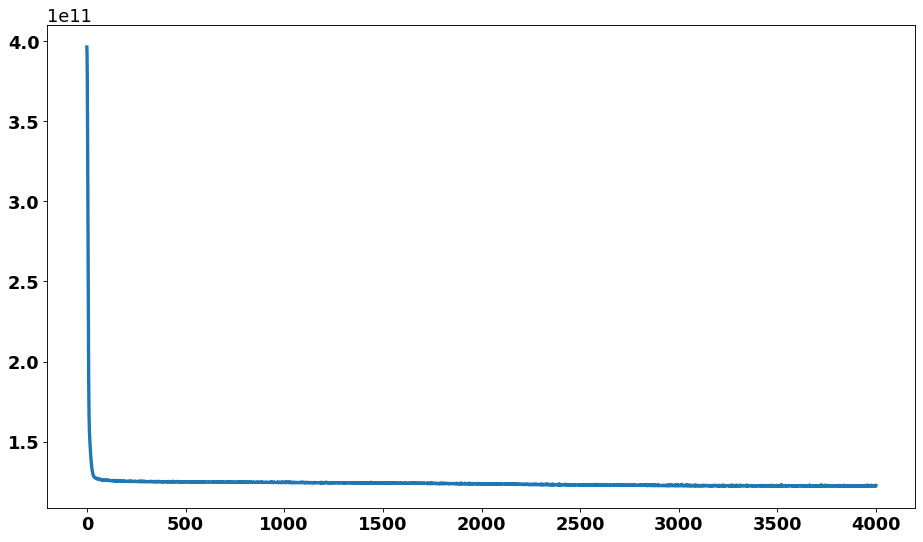

In [125]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(16)
# plt.title('Convergence Rate')
plt.plot(fitting_amfe.history['loss'], linewidth = 3)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [126]:
min(fitting_amfe.history['loss'])

122104553472.0

In [127]:
customizeAnn = ann_model_for_evaluation.customize() 
print('Input Layer weights: \n', customizeAnn.layers[0].get_weights()[0])
print('\n Hidden Layer 1 biases: \n', customizeAnn.layers[0].get_weights()[1])
print('\n Hidden Layer 1 weights: \n', customizeAnn.layers[1].get_weights()[0])
print('\n output Layer biases: \n', customizeAnn.layers[1].get_weights()[1])

Input Layer weights: 
 [[106.623184  -95.14501   -95.71774   ... -97.76087   105.61665
  -96.720726 ]
 [-51.37959    33.71488    33.854668  ...  32.23078   -51.706028
   32.993225 ]
 [-58.71108    -2.84909    -4.6001897 ...  -4.9081135 -58.47007
   -4.140735 ]
 [-21.718027   -3.6304286  -5.001945  ...  -4.309678  -21.255241
   -4.1844616]
 [ 15.170522   10.498982   10.411312  ...  11.870194   15.7019825
   11.469104 ]
 [ 40.868042   21.22548    22.855701  ...  24.863476   41.0612
   23.65372  ]]

 Hidden Layer 1 biases: 
 [46.392063 24.045994 28.867325 46.466713 46.490032 24.710798 46.57771
 28.760187 24.222536 28.848467 24.738737 46.494713 24.79415  24.979527
 28.699451 46.03335  28.748526 24.667068 28.702383 46.565166 28.758724
 25.155819 46.290154 24.19618  24.338736 24.64852  46.18601  46.04502
 28.82863  46.006714 46.459312 46.33549  24.190214 25.096624 46.412693
 24.183403 24.07097  25.148935 46.554413 24.44399  46.53094  46.01293
 28.744377 24.757593 46.240303 46.312138 23.95527


 output Layer biases: 
 [-136.35754 -156.45018 -156.4755 ]


In [128]:
ann_evaluation_model_prediction_on_training = ann_model_for_evaluation.predict(input_train_tf)
ann_evaluation_model_prediction_on_test = ann_model_for_evaluation.predict(input_test_tf)

In [129]:
ann_model_for_evaluation_customize = ann_model_for_evaluation.customize()
print(ann_model_for_evaluation_customize.evaluate(input_train_tf, output_train_tf))
print(ann_model_for_evaluation_customize.evaluate(input_test_tf, output_test_tf))
# forecasting_fitting.history.keys()

21/21 [==============================] - 0s 1ms/step - loss: 122156269568.0000 - mean_absolute_error: 261294.8906
[122156269568.0, 261294.890625]
2/2 [==============================] - 0s 8ms/step - loss: 166651281408.0000 - mean_absolute_error: 287936.5938
[166651281408.0, 287936.59375]


In [130]:
# min(ann_evaluation_model_prediction_on_test)
np.max(ann_evaluation_model_prediction_on_test)
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e3)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e3)))
y_ticks.shape


(1130,)

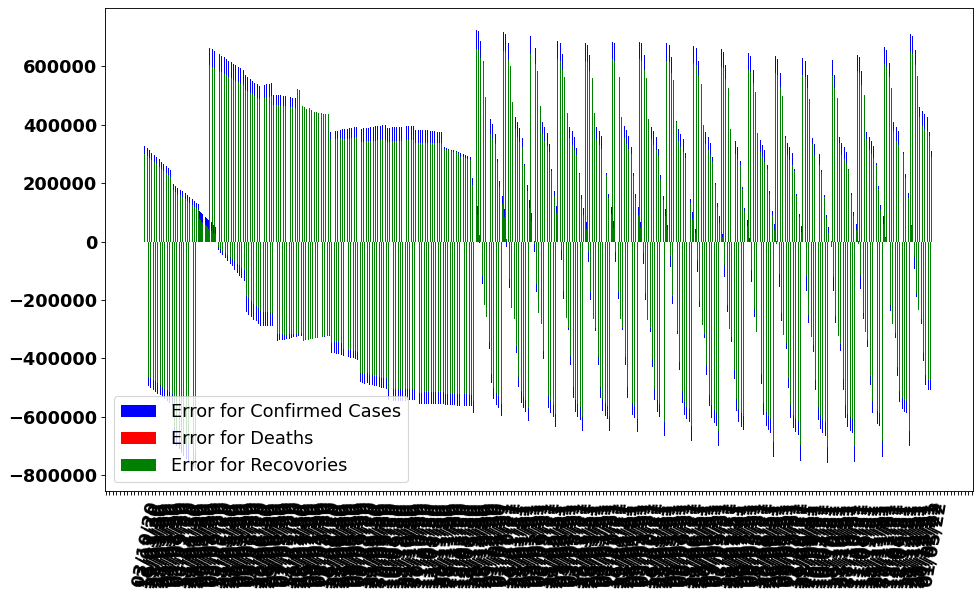

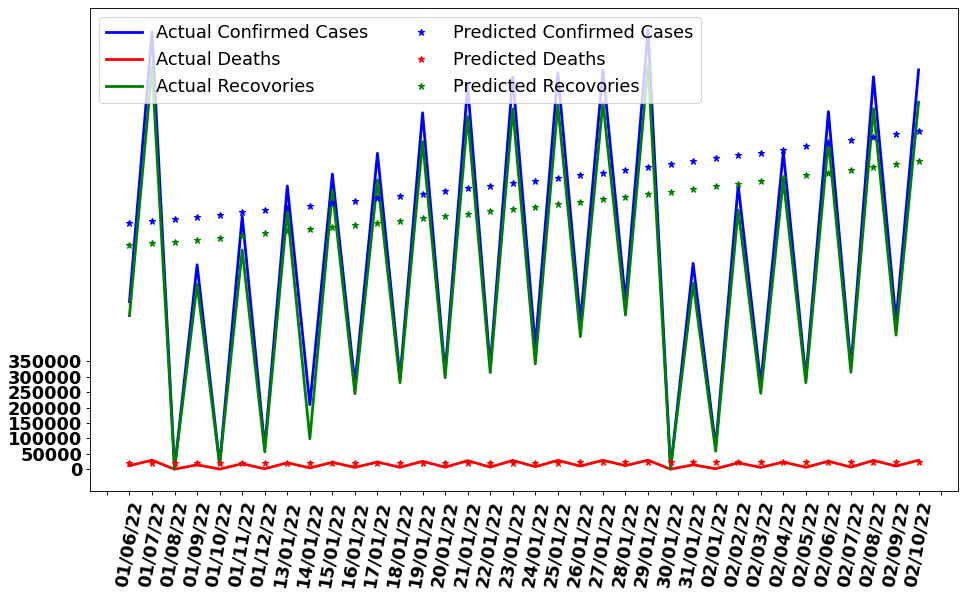

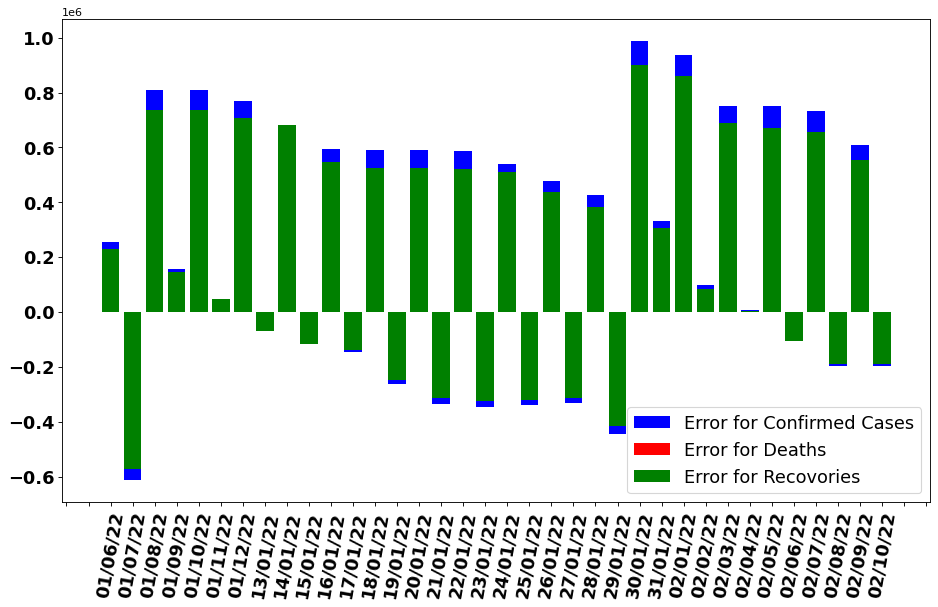

In [132]:
# plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=16)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates_train, output_train_tf[:,0], 'b', output_train_tf[:,1], 'r', output_train_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates_train, 
#          ann_evaluation_model_prediction_on_training[:,0], '*b', 
#          ann_evaluation_model_prediction_on_training[:,1], '*r', 
#          ann_evaluation_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], prop = {'size': 16})
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# plt.show()

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,0].reshape(-1,) - output_train_tf[:,0]), color = 'b')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,1].reshape(-1,) - output_train_tf[:,1]), color = 'r')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,2].reshape(-1,) - output_train_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()


figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Evaluating ANN Model on Test Data")
plt.plot(dates_test, output_test_tf[:,0], 'b', output_test_tf[:,1], 'r', output_test_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_test, 
         ann_evaluation_model_prediction_on_test[:,0], '*b', 
         ann_evaluation_model_prediction_on_test[:,1], '*r', 
         ann_evaluation_model_prediction_on_test[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 16}, loc='upper left', ncol=2)
plt.xticks(rotation=80, weight='bold');
# y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
#                     np.max(ann_evaluation_model_prediction_on_test), 1e4)
# y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e4)))
plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
plt.show()

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,0].reshape(-1,) - output_test_tf[:,0]), color = 'b')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,1].reshape(-1,) - output_test_tf[:,1]), color = 'r')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,2].reshape(-1,) - output_test_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

# 2 - Training on whole data and prediction on future data

In [133]:
output_data_tf = tf.convert_to_tensor(np.array(conf_death_recov), dtype=tf.float32)
input_data_tf = tf.convert_to_tensor(np.array(input_data_scaled), dtype=tf.float32)
ann_model_for_future = annModel(input_data_tf, output_data_tf)
ann_model_for_future.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               1400      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [134]:
fitting_amff = ann_model_for_future.fit(best_epochs)

Epoch 1/4000
22/22 [==============================] - 1s 2ms/step - loss: 397468794880.0000 - mean_absolute_error: 429341.0000
Epoch 2/4000
22/22 [==============================] - 0s 2ms/step - loss: 392062533632.0000 - mean_absolute_error: 424445.9062
Epoch 3/4000
22/22 [==============================] - 0s 2ms/step - loss: 378134167552.0000 - mean_absolute_error: 414824.5938
Epoch 4/4000
22/22 [==============================] - 0s 2ms/step - loss: 354407088128.0000 - mean_absolute_error: 398997.0625
Epoch 5/4000
22/22 [==============================] - 0s 2ms/step - loss: 323857580032.0000 - mean_absolute_error: 378477.8438
Epoch 6/4000
22/22 [==============================] - 0s 2ms/step - loss: 289259421696.0000 - mean_absolute_error: 355134.9062
Epoch 7/4000
22/22 [==============================] - 0s 2ms/step - loss: 254733123584.0000 - mean_absolute_error: 330676.5938
Epoch 8/4000
22/22 [==============================] - 0s 2ms/step - loss: 224619380736.0000 - mean_absolute_err

22/22 [==============================] - 0s 1ms/step - loss: 127139545088.0000 - mean_absolute_error: 261645.8125
Epoch 66/4000
22/22 [==============================] - 0s 2ms/step - loss: 127120441344.0000 - mean_absolute_error: 261853.4062
Epoch 67/4000
22/22 [==============================] - 0s 2ms/step - loss: 127031779328.0000 - mean_absolute_error: 261686.4688
Epoch 68/4000
22/22 [==============================] - 0s 3ms/step - loss: 126995398656.0000 - mean_absolute_error: 261944.8281
Epoch 69/4000
22/22 [==============================] - 0s 2ms/step - loss: 126924480512.0000 - mean_absolute_error: 262017.7969
Epoch 70/4000
22/22 [==============================] - 0s 1ms/step - loss: 126926643200.0000 - mean_absolute_error: 261823.5625
Epoch 71/4000
22/22 [==============================] - 0s 1ms/step - loss: 126990483456.0000 - mean_absolute_error: 262028.0156
Epoch 72/4000
22/22 [==============================] - 0s 2ms/step - loss: 126991237120.0000 - mean_absolute_error: 26

22/22 [==============================] - 0s 2ms/step - loss: 126092779520.0000 - mean_absolute_error: 261784.4375
Epoch 129/4000
22/22 [==============================] - 0s 1ms/step - loss: 126174101504.0000 - mean_absolute_error: 261639.9375
Epoch 130/4000
22/22 [==============================] - 0s 1ms/step - loss: 125998850048.0000 - mean_absolute_error: 261471.0625
Epoch 131/4000
22/22 [==============================] - 0s 2ms/step - loss: 126195400704.0000 - mean_absolute_error: 261966.3594
Epoch 132/4000
22/22 [==============================] - 0s 1ms/step - loss: 126088912896.0000 - mean_absolute_error: 261608.1250
Epoch 133/4000
22/22 [==============================] - 0s 3ms/step - loss: 126366203904.0000 - mean_absolute_error: 261786.6719
Epoch 134/4000
22/22 [==============================] - 0s 2ms/step - loss: 125969317888.0000 - mean_absolute_error: 261509.1875
Epoch 135/4000
22/22 [==============================] - 0s 2ms/step - loss: 125995696128.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 125588365312.0000 - mean_absolute_error: 261514.6562
Epoch 192/4000
22/22 [==============================] - 0s 2ms/step - loss: 125644914688.0000 - mean_absolute_error: 261570.2812
Epoch 193/4000
22/22 [==============================] - 0s 2ms/step - loss: 125697802240.0000 - mean_absolute_error: 261676.2031
Epoch 194/4000
22/22 [==============================] - 0s 2ms/step - loss: 125757284352.0000 - mean_absolute_error: 261664.0156
Epoch 195/4000
22/22 [==============================] - 0s 2ms/step - loss: 125627064320.0000 - mean_absolute_error: 261588.9219
Epoch 196/4000
22/22 [==============================] - 0s 2ms/step - loss: 125662650368.0000 - mean_absolute_error: 261486.2656
Epoch 197/4000
22/22 [==============================] - 0s 1ms/step - loss: 125624606720.0000 - mean_absolute_error: 261385.5625
Epoch 198/4000
22/22 [==============================] - 0s 1ms/step - loss: 125594189824.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 125495083008.0000 - mean_absolute_error: 261781.2969
Epoch 255/4000
22/22 [==============================] - 0s 2ms/step - loss: 125529776128.0000 - mean_absolute_error: 261695.6406
Epoch 256/4000
22/22 [==============================] - 0s 2ms/step - loss: 125594271744.0000 - mean_absolute_error: 261455.7031
Epoch 257/4000
22/22 [==============================] - 0s 2ms/step - loss: 125552689152.0000 - mean_absolute_error: 261584.6094
Epoch 258/4000
22/22 [==============================] - 0s 2ms/step - loss: 125482737664.0000 - mean_absolute_error: 261721.3125
Epoch 259/4000
22/22 [==============================] - 0s 2ms/step - loss: 125551017984.0000 - mean_absolute_error: 261879.1875
Epoch 260/4000
22/22 [==============================] - 0s 3ms/step - loss: 125412311040.0000 - mean_absolute_error: 261778.0781
Epoch 261/4000
22/22 [==============================] - 0s 3ms/step - loss: 125502504960.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 125399375872.0000 - mean_absolute_error: 261403.4062
Epoch 318/4000
22/22 [==============================] - 0s 2ms/step - loss: 125580918784.0000 - mean_absolute_error: 262078.2188
Epoch 319/4000
22/22 [==============================] - 0s 2ms/step - loss: 125470662656.0000 - mean_absolute_error: 261669.3281
Epoch 320/4000
22/22 [==============================] - 0s 2ms/step - loss: 125442752512.0000 - mean_absolute_error: 261745.8906
Epoch 321/4000
22/22 [==============================] - 0s 2ms/step - loss: 125474816000.0000 - mean_absolute_error: 261509.7812
Epoch 322/4000
22/22 [==============================] - 0s 2ms/step - loss: 125388619776.0000 - mean_absolute_error: 261700.4531
Epoch 323/4000
22/22 [==============================] - 0s 2ms/step - loss: 125489135616.0000 - mean_absolute_error: 261538.2344
Epoch 324/4000
22/22 [==============================] - 0s 2ms/step - loss: 125471834112.0000 - mean_absolute_er

Epoch 379/4000
22/22 [==============================] - 0s 2ms/step - loss: 125315432448.0000 - mean_absolute_error: 261623.0625
Epoch 380/4000
22/22 [==============================] - 0s 2ms/step - loss: 125449232384.0000 - mean_absolute_error: 262043.0781
Epoch 381/4000
22/22 [==============================] - 0s 2ms/step - loss: 125399474176.0000 - mean_absolute_error: 261638.2344
Epoch 382/4000
22/22 [==============================] - 0s 2ms/step - loss: 125556744192.0000 - mean_absolute_error: 261530.2031
Epoch 383/4000
22/22 [==============================] - 0s 2ms/step - loss: 125603430400.0000 - mean_absolute_error: 261750.7188
Epoch 384/4000
22/22 [==============================] - 0s 1ms/step - loss: 125460676608.0000 - mean_absolute_error: 261861.0469
Epoch 385/4000
22/22 [==============================] - 0s 2ms/step - loss: 125507371008.0000 - mean_absolute_error: 261617.7812
Epoch 386/4000
22/22 [==============================] - 0s 2ms/step - loss: 125411393536.0000 - m

22/22 [==============================] - 0s 2ms/step - loss: 125270827008.0000 - mean_absolute_error: 261508.0312
Epoch 442/4000
22/22 [==============================] - 0s 2ms/step - loss: 125428113408.0000 - mean_absolute_error: 261865.0312
Epoch 443/4000
22/22 [==============================] - 0s 1ms/step - loss: 125363011584.0000 - mean_absolute_error: 261743.9531
Epoch 444/4000
22/22 [==============================] - 0s 2ms/step - loss: 125325729792.0000 - mean_absolute_error: 261970.4375
Epoch 445/4000
22/22 [==============================] - 0s 2ms/step - loss: 125378060288.0000 - mean_absolute_error: 261709.2969
Epoch 446/4000
22/22 [==============================] - 0s 2ms/step - loss: 125316161536.0000 - mean_absolute_error: 261497.9844
Epoch 447/4000
22/22 [==============================] - 0s 2ms/step - loss: 125249306624.0000 - mean_absolute_error: 261623.8125
Epoch 448/4000
22/22 [==============================] - 0s 2ms/step - loss: 125320830976.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 125316816896.0000 - mean_absolute_error: 261555.2344
Epoch 505/4000
22/22 [==============================] - 0s 2ms/step - loss: 125249732608.0000 - mean_absolute_error: 261703.4219
Epoch 506/4000
22/22 [==============================] - 0s 1ms/step - loss: 125274636288.0000 - mean_absolute_error: 261712.2031
Epoch 507/4000
22/22 [==============================] - 0s 994us/step - loss: 125202169856.0000 - mean_absolute_error: 261693.2188
Epoch 508/4000
22/22 [==============================] - 0s 2ms/step - loss: 125329326080.0000 - mean_absolute_error: 261953.1406
Epoch 509/4000
22/22 [==============================] - 0s 1ms/step - loss: 125416062976.0000 - mean_absolute_error: 261715.5312
Epoch 510/4000
22/22 [==============================] - 0s 1ms/step - loss: 125276471296.0000 - mean_absolute_error: 261361.4375
Epoch 511/4000
22/22 [==============================] - 0s 2ms/step - loss: 125416816640.0000 - mean_absolute_

22/22 [==============================] - 0s 2ms/step - loss: 125292224512.0000 - mean_absolute_error: 261571.4844
Epoch 568/4000
22/22 [==============================] - 0s 2ms/step - loss: 125235437568.0000 - mean_absolute_error: 261811.6406
Epoch 569/4000
22/22 [==============================] - 0s 2ms/step - loss: 125359644672.0000 - mean_absolute_error: 261984.4375
Epoch 570/4000
22/22 [==============================] - 0s 1ms/step - loss: 125214818304.0000 - mean_absolute_error: 261664.1406
Epoch 571/4000
22/22 [==============================] - 0s 2ms/step - loss: 125230473216.0000 - mean_absolute_error: 261569.5781
Epoch 572/4000
22/22 [==============================] - 0s 2ms/step - loss: 125223354368.0000 - mean_absolute_error: 261818.7188
Epoch 573/4000
22/22 [==============================] - 0s 2ms/step - loss: 125285769216.0000 - mean_absolute_error: 262014.0469
Epoch 574/4000
22/22 [==============================] - 0s 2ms/step - loss: 125196451840.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 125132308480.0000 - mean_absolute_error: 261484.2969
Epoch 631/4000
22/22 [==============================] - 0s 2ms/step - loss: 125283606528.0000 - mean_absolute_error: 261880.7188
Epoch 632/4000
22/22 [==============================] - 0s 3ms/step - loss: 125175201792.0000 - mean_absolute_error: 261891.4844
Epoch 633/4000
22/22 [==============================] - 0s 2ms/step - loss: 125184163840.0000 - mean_absolute_error: 261675.4062
Epoch 634/4000
22/22 [==============================] - 0s 2ms/step - loss: 125317472256.0000 - mean_absolute_error: 261836.6719
Epoch 635/4000
22/22 [==============================] - 0s 2ms/step - loss: 125167198208.0000 - mean_absolute_error: 261715.8750
Epoch 636/4000
22/22 [==============================] - 0s 2ms/step - loss: 125142491136.0000 - mean_absolute_error: 261617.2500
Epoch 637/4000
22/22 [==============================] - 0s 2ms/step - loss: 125164609536.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 125165264896.0000 - mean_absolute_error: 261626.3125
Epoch 694/4000
22/22 [==============================] - 0s 2ms/step - loss: 125146013696.0000 - mean_absolute_error: 261824.0000
Epoch 695/4000
22/22 [==============================] - 0s 2ms/step - loss: 125205676032.0000 - mean_absolute_error: 261710.7969
Epoch 696/4000
22/22 [==============================] - 0s 2ms/step - loss: 125341007872.0000 - mean_absolute_error: 261827.3281
Epoch 697/4000
22/22 [==============================] - 0s 3ms/step - loss: 125230833664.0000 - mean_absolute_error: 262056.9219
Epoch 698/4000
22/22 [==============================] - 0s 2ms/step - loss: 125205258240.0000 - mean_absolute_error: 262068.0312
Epoch 699/4000
22/22 [==============================] - 0s 2ms/step - loss: 125156147200.0000 - mean_absolute_error: 261540.8750
Epoch 700/4000
22/22 [==============================] - 0s 2ms/step - loss: 125182656512.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 125183459328.0000 - mean_absolute_error: 261740.5000
Epoch 757/4000
22/22 [==============================] - 0s 2ms/step - loss: 125125443584.0000 - mean_absolute_error: 261626.0156
Epoch 758/4000
22/22 [==============================] - 0s 2ms/step - loss: 125188481024.0000 - mean_absolute_error: 261781.0938
Epoch 759/4000
22/22 [==============================] - 0s 2ms/step - loss: 125112901632.0000 - mean_absolute_error: 262132.4531
Epoch 760/4000
22/22 [==============================] - 0s 2ms/step - loss: 125054459904.0000 - mean_absolute_error: 262023.3438
Epoch 761/4000
22/22 [==============================] - 0s 2ms/step - loss: 125146710016.0000 - mean_absolute_error: 261885.1094
Epoch 762/4000
22/22 [==============================] - 0s 2ms/step - loss: 125129515008.0000 - mean_absolute_error: 261389.9062
Epoch 763/4000
22/22 [==============================] - 0s 2ms/step - loss: 125053231104.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 125087817728.0000 - mean_absolute_error: 261742.6094
Epoch 820/4000
22/22 [==============================] - 0s 2ms/step - loss: 125037821952.0000 - mean_absolute_error: 261731.5781
Epoch 821/4000
22/22 [==============================] - 0s 2ms/step - loss: 125020397568.0000 - mean_absolute_error: 261759.8125
Epoch 822/4000
22/22 [==============================] - 0s 2ms/step - loss: 125097410560.0000 - mean_absolute_error: 262028.8125
Epoch 823/4000
22/22 [==============================] - 0s 2ms/step - loss: 124997836800.0000 - mean_absolute_error: 261736.1094
Epoch 824/4000
22/22 [==============================] - 0s 2ms/step - loss: 124988137472.0000 - mean_absolute_error: 261754.7031
Epoch 825/4000
22/22 [==============================] - 0s 2ms/step - loss: 125189726208.0000 - mean_absolute_error: 261964.0781
Epoch 826/4000
22/22 [==============================] - 0s 2ms/step - loss: 125142401024.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 124997713920.0000 - mean_absolute_error: 261945.8281
Epoch 883/4000
22/22 [==============================] - 0s 2ms/step - loss: 124996222976.0000 - mean_absolute_error: 261849.4375
Epoch 884/4000
22/22 [==============================] - 0s 2ms/step - loss: 124914442240.0000 - mean_absolute_error: 261643.9219
Epoch 885/4000
22/22 [==============================] - 0s 2ms/step - loss: 124965322752.0000 - mean_absolute_error: 261709.2656
Epoch 886/4000
22/22 [==============================] - 0s 2ms/step - loss: 125010960384.0000 - mean_absolute_error: 261613.3125
Epoch 887/4000
22/22 [==============================] - 0s 2ms/step - loss: 124947554304.0000 - mean_absolute_error: 261757.5156
Epoch 888/4000
22/22 [==============================] - 0s 2ms/step - loss: 124987719680.0000 - mean_absolute_error: 261672.1094
Epoch 889/4000
22/22 [==============================] - 0s 2ms/step - loss: 124997935104.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 124970459136.0000 - mean_absolute_error: 261840.3906
Epoch 946/4000
22/22 [==============================] - 0s 1ms/step - loss: 124932243456.0000 - mean_absolute_error: 261730.5000
Epoch 947/4000
22/22 [==============================] - 0s 2ms/step - loss: 125014458368.0000 - mean_absolute_error: 261787.6719
Epoch 948/4000
22/22 [==============================] - 0s 2ms/step - loss: 124980854784.0000 - mean_absolute_error: 261768.7812
Epoch 949/4000
22/22 [==============================] - 0s 1ms/step - loss: 125132161024.0000 - mean_absolute_error: 261920.5312
Epoch 950/4000
22/22 [==============================] - 0s 2ms/step - loss: 124887736320.0000 - mean_absolute_error: 261558.2656
Epoch 951/4000
22/22 [==============================] - 0s 2ms/step - loss: 124911738880.0000 - mean_absolute_error: 261846.0781
Epoch 952/4000
22/22 [==============================] - 0s 2ms/step - loss: 125029048320.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 124897411072.0000 - mean_absolute_error: 261727.7656
Epoch 1009/4000
22/22 [==============================] - 0s 2ms/step - loss: 124856279040.0000 - mean_absolute_error: 261844.9375
Epoch 1010/4000
22/22 [==============================] - 0s 2ms/step - loss: 124939788288.0000 - mean_absolute_error: 261675.6562
Epoch 1011/4000
22/22 [==============================] - 0s 2ms/step - loss: 124892684288.0000 - mean_absolute_error: 261668.6719
Epoch 1012/4000
22/22 [==============================] - 0s 2ms/step - loss: 124913213440.0000 - mean_absolute_error: 261939.7344
Epoch 1013/4000
22/22 [==============================] - 0s 1ms/step - loss: 124926279680.0000 - mean_absolute_error: 261730.9375
Epoch 1014/4000
22/22 [==============================] - 0s 2ms/step - loss: 124903211008.0000 - mean_absolute_error: 261587.7031
Epoch 1015/4000
22/22 [==============================] - 0s 1ms/step - loss: 124918505472.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124834136064.0000 - mean_absolute_error: 261698.6875
Epoch 1072/4000
22/22 [==============================] - 0s 2ms/step - loss: 125010927616.0000 - mean_absolute_error: 261956.6719
Epoch 1073/4000
22/22 [==============================] - 0s 2ms/step - loss: 124830015488.0000 - mean_absolute_error: 261444.6875
Epoch 1074/4000
22/22 [==============================] - 0s 2ms/step - loss: 124915154944.0000 - mean_absolute_error: 261798.6406
Epoch 1075/4000
22/22 [==============================] - 0s 1ms/step - loss: 124782772224.0000 - mean_absolute_error: 261697.6562
Epoch 1076/4000
22/22 [==============================] - 0s 1ms/step - loss: 124909543424.0000 - mean_absolute_error: 261721.6719
Epoch 1077/4000
22/22 [==============================] - 0s 808us/step - loss: 124822233088.0000 - mean_absolute_error: 261742.8438
Epoch 1078/4000
22/22 [==============================] - 0s 977us/step - loss: 124976717824.0000 - mean_

22/22 [==============================] - 0s 3ms/step - loss: 124797108224.0000 - mean_absolute_error: 261586.2344
Epoch 1134/4000
22/22 [==============================] - 0s 2ms/step - loss: 124840919040.0000 - mean_absolute_error: 261557.0938
Epoch 1135/4000
22/22 [==============================] - 0s 2ms/step - loss: 124802359296.0000 - mean_absolute_error: 261724.9688
Epoch 1136/4000
22/22 [==============================] - 0s 2ms/step - loss: 124837232640.0000 - mean_absolute_error: 261821.2656
Epoch 1137/4000
22/22 [==============================] - 0s 2ms/step - loss: 124771262464.0000 - mean_absolute_error: 261856.2500
Epoch 1138/4000
22/22 [==============================] - 0s 2ms/step - loss: 124809011200.0000 - mean_absolute_error: 261666.0938
Epoch 1139/4000
22/22 [==============================] - 0s 2ms/step - loss: 124841304064.0000 - mean_absolute_error: 261578.5781
Epoch 1140/4000
22/22 [==============================] - 0s 2ms/step - loss: 124977774592.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124731727872.0000 - mean_absolute_error: 261801.2656
Epoch 1197/4000
22/22 [==============================] - 0s 2ms/step - loss: 124755894272.0000 - mean_absolute_error: 261762.8281
Epoch 1198/4000
22/22 [==============================] - 0s 2ms/step - loss: 124724330496.0000 - mean_absolute_error: 261567.0469
Epoch 1199/4000
22/22 [==============================] - 0s 2ms/step - loss: 124701442048.0000 - mean_absolute_error: 261588.3750
Epoch 1200/4000
22/22 [==============================] - ETA: 0s - loss: 158065819648.0000 - mean_absolute_error: 302797.937 - 0s 2ms/step - loss: 124751986688.0000 - mean_absolute_error: 261871.7656
Epoch 1201/4000
22/22 [==============================] - 0s 2ms/step - loss: 124860612608.0000 - mean_absolute_error: 262083.1875
Epoch 1202/4000
22/22 [==============================] - 0s 2ms/step - loss: 124859514880.0000 - mean_absolute_error: 261692.0469
Epoch 1203/4000
22/22 [=============

22/22 [==============================] - 0s 2ms/step - loss: 124662808576.0000 - mean_absolute_error: 261823.4531
Epoch 1259/4000
22/22 [==============================] - 0s 2ms/step - loss: 124685295616.0000 - mean_absolute_error: 261533.6562
Epoch 1260/4000
22/22 [==============================] - 0s 3ms/step - loss: 124694749184.0000 - mean_absolute_error: 261723.5781
Epoch 1261/4000
22/22 [==============================] - 0s 2ms/step - loss: 124763586560.0000 - mean_absolute_error: 261819.0625
Epoch 1262/4000
22/22 [==============================] - 0s 2ms/step - loss: 124729253888.0000 - mean_absolute_error: 261671.1875
Epoch 1263/4000
22/22 [==============================] - 0s 2ms/step - loss: 124707946496.0000 - mean_absolute_error: 261722.0625
Epoch 1264/4000
22/22 [==============================] - 0s 2ms/step - loss: 124722216960.0000 - mean_absolute_error: 261824.6406
Epoch 1265/4000
22/22 [==============================] - 0s 2ms/step - loss: 124823969792.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124585132032.0000 - mean_absolute_error: 261567.0469
Epoch 1322/4000
22/22 [==============================] - 0s 2ms/step - loss: 124652732416.0000 - mean_absolute_error: 261840.3125
Epoch 1323/4000
22/22 [==============================] - 0s 2ms/step - loss: 124623650816.0000 - mean_absolute_error: 261938.9531
Epoch 1324/4000
22/22 [==============================] - 0s 2ms/step - loss: 124676612096.0000 - mean_absolute_error: 261655.0156
Epoch 1325/4000
22/22 [==============================] - 0s 2ms/step - loss: 124674703360.0000 - mean_absolute_error: 261660.6250
Epoch 1326/4000
22/22 [==============================] - 0s 2ms/step - loss: 124655910912.0000 - mean_absolute_error: 261777.9062
Epoch 1327/4000
22/22 [==============================] - 0s 2ms/step - loss: 124740984832.0000 - mean_absolute_error: 261801.9844
Epoch 1328/4000
22/22 [==============================] - 0s 2ms/step - loss: 124598329344.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124653690880.0000 - mean_absolute_error: 261677.9688
Epoch 1385/4000
22/22 [==============================] - 0s 2ms/step - loss: 124578095104.0000 - mean_absolute_error: 261515.7188
Epoch 1386/4000
22/22 [==============================] - 0s 2ms/step - loss: 124596510720.0000 - mean_absolute_error: 261800.6719
Epoch 1387/4000
22/22 [==============================] - 0s 2ms/step - loss: 124688916480.0000 - mean_absolute_error: 261812.4531
Epoch 1388/4000
22/22 [==============================] - 0s 2ms/step - loss: 124707921920.0000 - mean_absolute_error: 261696.1094
Epoch 1389/4000
22/22 [==============================] - 0s 2ms/step - loss: 124729556992.0000 - mean_absolute_error: 261815.5781
Epoch 1390/4000
22/22 [==============================] - 0s 2ms/step - loss: 124606111744.0000 - mean_absolute_error: 261916.7188
Epoch 1391/4000
22/22 [==============================] - 0s 2ms/step - loss: 124599345152.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124505440256.0000 - mean_absolute_error: 261761.1875
Epoch 1447/4000
22/22 [==============================] - 0s 2ms/step - loss: 124574597120.0000 - mean_absolute_error: 261831.6875
Epoch 1448/4000
22/22 [==============================] - 0s 2ms/step - loss: 124567674880.0000 - mean_absolute_error: 261973.2500
Epoch 1449/4000
22/22 [==============================] - 0s 2ms/step - loss: 124677996544.0000 - mean_absolute_error: 261749.6875
Epoch 1450/4000
22/22 [==============================] - 0s 2ms/step - loss: 124595527680.0000 - mean_absolute_error: 261721.9062
Epoch 1451/4000
22/22 [==============================] - 0s 2ms/step - loss: 124602744832.0000 - mean_absolute_error: 261762.7344
Epoch 1452/4000
22/22 [==============================] - 0s 2ms/step - loss: 124530507776.0000 - mean_absolute_error: 261866.9688
Epoch 1453/4000
22/22 [==============================] - 0s 1ms/step - loss: 124502040576.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124712943616.0000 - mean_absolute_error: 262082.0312
Epoch 1510/4000
22/22 [==============================] - 0s 2ms/step - loss: 124591661056.0000 - mean_absolute_error: 261732.2500
Epoch 1511/4000
22/22 [==============================] - 0s 2ms/step - loss: 124598190080.0000 - mean_absolute_error: 261742.3125
Epoch 1512/4000
22/22 [==============================] - 0s 2ms/step - loss: 124502753280.0000 - mean_absolute_error: 261816.2188
Epoch 1513/4000
22/22 [==============================] - 0s 2ms/step - loss: 124466659328.0000 - mean_absolute_error: 261804.1719
Epoch 1514/4000
22/22 [==============================] - 0s 2ms/step - loss: 124484509696.0000 - mean_absolute_error: 261686.2344
Epoch 1515/4000
22/22 [==============================] - 0s 2ms/step - loss: 124473589760.0000 - mean_absolute_error: 261827.1875
Epoch 1516/4000
22/22 [==============================] - 0s 2ms/step - loss: 124538142720.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124447449088.0000 - mean_absolute_error: 261852.1562
Epoch 1572/4000
22/22 [==============================] - 0s 2ms/step - loss: 124561661952.0000 - mean_absolute_error: 261750.4844
Epoch 1573/4000
22/22 [==============================] - 0s 2ms/step - loss: 124506595328.0000 - mean_absolute_error: 261895.3125
Epoch 1574/4000
22/22 [==============================] - 0s 1ms/step - loss: 124492529664.0000 - mean_absolute_error: 261966.9688
Epoch 1575/4000
22/22 [==============================] - 0s 1ms/step - loss: 124503851008.0000 - mean_absolute_error: 261951.7344
Epoch 1576/4000
22/22 [==============================] - 0s 2ms/step - loss: 124477349888.0000 - mean_absolute_error: 261866.0156
Epoch 1577/4000
22/22 [==============================] - 0s 2ms/step - loss: 124422234112.0000 - mean_absolute_error: 261745.2031
Epoch 1578/4000
22/22 [==============================] - 0s 2ms/step - loss: 124497100800.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124552790016.0000 - mean_absolute_error: 262105.2188
Epoch 1635/4000
22/22 [==============================] - 0s 1ms/step - loss: 124432293888.0000 - mean_absolute_error: 261613.0469
Epoch 1636/4000
22/22 [==============================] - 0s 2ms/step - loss: 124428541952.0000 - mean_absolute_error: 261791.6875
Epoch 1637/4000
22/22 [==============================] - 0s 2ms/step - loss: 124423700480.0000 - mean_absolute_error: 261626.1094
Epoch 1638/4000
22/22 [==============================] - 0s 2ms/step - loss: 124368789504.0000 - mean_absolute_error: 261787.9062
Epoch 1639/4000
22/22 [==============================] - 0s 2ms/step - loss: 124391350272.0000 - mean_absolute_error: 261777.4531
Epoch 1640/4000
22/22 [==============================] - 0s 2ms/step - loss: 124402294784.0000 - mean_absolute_error: 261781.6250
Epoch 1641/4000
22/22 [==============================] - 0s 2ms/step - loss: 124350341120.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124342394880.0000 - mean_absolute_error: 261762.7500
Epoch 1697/4000
22/22 [==============================] - 0s 2ms/step - loss: 124591816704.0000 - mean_absolute_error: 261741.2969
Epoch 1698/4000
22/22 [==============================] - 0s 1ms/step - loss: 124363726848.0000 - mean_absolute_error: 261732.2344
Epoch 1699/4000
22/22 [==============================] - 0s 1ms/step - loss: 124452315136.0000 - mean_absolute_error: 261989.2500
Epoch 1700/4000
22/22 [==============================] - 0s 2ms/step - loss: 124380766208.0000 - mean_absolute_error: 261603.0938
Epoch 1701/4000
22/22 [==============================] - 0s 2ms/step - loss: 124467232768.0000 - mean_absolute_error: 261701.7344
Epoch 1702/4000
22/22 [==============================] - 0s 2ms/step - loss: 124530941952.0000 - mean_absolute_error: 261677.2500
Epoch 1703/4000
22/22 [==============================] - 0s 2ms/step - loss: 124446433280.0000 - mean_abso

Epoch 1759/4000
22/22 [==============================] - 0s 2ms/step - loss: 124264988672.0000 - mean_absolute_error: 261742.8906
Epoch 1760/4000
22/22 [==============================] - 0s 2ms/step - loss: 124305219584.0000 - mean_absolute_error: 261897.1094
Epoch 1761/4000
22/22 [==============================] - 0s 2ms/step - loss: 124372926464.0000 - mean_absolute_error: 261815.3750
Epoch 1762/4000
22/22 [==============================] - 0s 2ms/step - loss: 124341846016.0000 - mean_absolute_error: 261640.2812
Epoch 1763/4000
22/22 [==============================] - 0s 2ms/step - loss: 124454174720.0000 - mean_absolute_error: 261739.0625
Epoch 1764/4000
22/22 [==============================] - 0s 2ms/step - loss: 124255297536.0000 - mean_absolute_error: 261730.8438
Epoch 1765/4000
22/22 [==============================] - 0s 2ms/step - loss: 124339716096.0000 - mean_absolute_error: 261964.3750
Epoch 1766/4000
22/22 [==============================] - 0s 2ms/step - loss: 124240936960.

22/22 [==============================] - 0s 2ms/step - loss: 124254232576.0000 - mean_absolute_error: 261932.8750
Epoch 1822/4000
22/22 [==============================] - 0s 2ms/step - loss: 124365897728.0000 - mean_absolute_error: 261946.2188
Epoch 1823/4000
22/22 [==============================] - 0s 2ms/step - loss: 124661178368.0000 - mean_absolute_error: 262144.4688
Epoch 1824/4000
22/22 [==============================] - 0s 2ms/step - loss: 124204662784.0000 - mean_absolute_error: 261668.2969
Epoch 1825/4000
22/22 [==============================] - 0s 2ms/step - loss: 124223234048.0000 - mean_absolute_error: 261763.2500
Epoch 1826/4000
22/22 [==============================] - 0s 1ms/step - loss: 124303548416.0000 - mean_absolute_error: 261796.2969
Epoch 1827/4000
22/22 [==============================] - 0s 2ms/step - loss: 124262170624.0000 - mean_absolute_error: 261562.3594
Epoch 1828/4000
22/22 [==============================] - 0s 2ms/step - loss: 124388442112.0000 - mean_abso

22/22 [==============================] - 0s 1ms/step - loss: 124522438656.0000 - mean_absolute_error: 262247.1875
Epoch 1885/4000
22/22 [==============================] - 0s 1ms/step - loss: 124386443264.0000 - mean_absolute_error: 261689.0156
Epoch 1886/4000
22/22 [==============================] - 0s 2ms/step - loss: 124265512960.0000 - mean_absolute_error: 261457.4844
Epoch 1887/4000
22/22 [==============================] - 0s 1ms/step - loss: 124334587904.0000 - mean_absolute_error: 262119.3438
Epoch 1888/4000
22/22 [==============================] - 0s 1ms/step - loss: 124265078784.0000 - mean_absolute_error: 261908.4219
Epoch 1889/4000
22/22 [==============================] - 0s 1ms/step - loss: 124218163200.0000 - mean_absolute_error: 261673.5312
Epoch 1890/4000
22/22 [==============================] - 0s 1ms/step - loss: 124222169088.0000 - mean_absolute_error: 261993.5156
Epoch 1891/4000
22/22 [==============================] - 0s 2ms/step - loss: 124117458944.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124112363520.0000 - mean_absolute_error: 261668.2344
Epoch 1947/4000
22/22 [==============================] - 0s 2ms/step - loss: 124096249856.0000 - mean_absolute_error: 261821.3750
Epoch 1948/4000
22/22 [==============================] - 0s 2ms/step - loss: 124151136256.0000 - mean_absolute_error: 261733.4688
Epoch 1949/4000
22/22 [==============================] - 0s 2ms/step - loss: 124058730496.0000 - mean_absolute_error: 261608.8750
Epoch 1950/4000
22/22 [==============================] - 0s 2ms/step - loss: 124312018944.0000 - mean_absolute_error: 262239.3438
Epoch 1951/4000
22/22 [==============================] - 0s 2ms/step - loss: 124177612800.0000 - mean_absolute_error: 261704.2812
Epoch 1952/4000
22/22 [==============================] - 0s 2ms/step - loss: 124155600896.0000 - mean_absolute_error: 261462.3750
Epoch 1953/4000
22/22 [==============================] - 0s 2ms/step - loss: 124199632896.0000 - mean_abso

22/22 [==============================] - 0s 5ms/step - loss: 124242001920.0000 - mean_absolute_error: 261686.9844
Epoch 2009/4000
22/22 [==============================] - 0s 3ms/step - loss: 124036702208.0000 - mean_absolute_error: 261617.5312
Epoch 2010/4000
22/22 [==============================] - 0s 2ms/step - loss: 124181659648.0000 - mean_absolute_error: 262198.7500
Epoch 2011/4000
22/22 [==============================] - 0s 2ms/step - loss: 124147187712.0000 - mean_absolute_error: 261939.9844
Epoch 2012/4000
22/22 [==============================] - 0s 2ms/step - loss: 124166217728.0000 - mean_absolute_error: 261706.7188
Epoch 2013/4000
22/22 [==============================] - 0s 1ms/step - loss: 124143239168.0000 - mean_absolute_error: 261457.4375
Epoch 2014/4000
22/22 [==============================] - 0s 2ms/step - loss: 124251258880.0000 - mean_absolute_error: 262235.7500
Epoch 2015/4000
22/22 [==============================] - 0s 2ms/step - loss: 124117843968.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124007825408.0000 - mean_absolute_error: 261786.3594
Epoch 2072/4000
22/22 [==============================] - 0s 1ms/step - loss: 123968839680.0000 - mean_absolute_error: 261697.0000
Epoch 2073/4000
22/22 [==============================] - 0s 2ms/step - loss: 124052905984.0000 - mean_absolute_error: 261709.1719
Epoch 2074/4000
22/22 [==============================] - 0s 1ms/step - loss: 123976441856.0000 - mean_absolute_error: 261662.2656
Epoch 2075/4000
22/22 [==============================] - 0s 2ms/step - loss: 124111290368.0000 - mean_absolute_error: 262046.6406
Epoch 2076/4000
22/22 [==============================] - 0s 2ms/step - loss: 124054740992.0000 - mean_absolute_error: 261695.2188
Epoch 2077/4000
22/22 [==============================] - 0s 2ms/step - loss: 124013158400.0000 - mean_absolute_error: 261649.5469
Epoch 2078/4000
22/22 [==============================] - 0s 2ms/step - loss: 124113190912.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 124394151936.0000 - mean_absolute_error: 262052.7500
Epoch 2135/4000
22/22 [==============================] - 0s 2ms/step - loss: 124096724992.0000 - mean_absolute_error: 261910.2188
Epoch 2136/4000
22/22 [==============================] - 0s 2ms/step - loss: 123940511744.0000 - mean_absolute_error: 261808.5000
Epoch 2137/4000
22/22 [==============================] - 0s 2ms/step - loss: 123948900352.0000 - mean_absolute_error: 261617.5469
Epoch 2138/4000
22/22 [==============================] - 0s 2ms/step - loss: 123893202944.0000 - mean_absolute_error: 261705.2656
Epoch 2139/4000
22/22 [==============================] - 0s 2ms/step - loss: 123921448960.0000 - mean_absolute_error: 261849.1719
Epoch 2140/4000
22/22 [==============================] - 0s 2ms/step - loss: 123989270528.0000 - mean_absolute_error: 261924.1406
Epoch 2141/4000
22/22 [==============================] - 0s 2ms/step - loss: 124051808256.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123864309760.0000 - mean_absolute_error: 261628.8750
Epoch 2197/4000
22/22 [==============================] - 0s 2ms/step - loss: 123851530240.0000 - mean_absolute_error: 261619.3750
Epoch 2198/4000
22/22 [==============================] - 0s 2ms/step - loss: 123793006592.0000 - mean_absolute_error: 261915.5625
Epoch 2199/4000
22/22 [==============================] - 0s 2ms/step - loss: 123842371584.0000 - mean_absolute_error: 261943.1719
Epoch 2200/4000
22/22 [==============================] - 0s 2ms/step - loss: 123923030016.0000 - mean_absolute_error: 261748.8750
Epoch 2201/4000
22/22 [==============================] - 0s 1ms/step - loss: 123965874176.0000 - mean_absolute_error: 261885.7031
Epoch 2202/4000
22/22 [==============================] - 0s 2ms/step - loss: 123910848512.0000 - mean_absolute_error: 261639.4688
Epoch 2203/4000
22/22 [==============================] - 0s 2ms/step - loss: 123821219840.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123729141760.0000 - mean_absolute_error: 261681.0000
Epoch 2260/4000
22/22 [==============================] - 0s 2ms/step - loss: 124002443264.0000 - mean_absolute_error: 262370.3125
Epoch 2261/4000
22/22 [==============================] - 0s 2ms/step - loss: 123865972736.0000 - mean_absolute_error: 261685.4844
Epoch 2262/4000
22/22 [==============================] - 0s 2ms/step - loss: 124011331584.0000 - mean_absolute_error: 261877.3281
Epoch 2263/4000
22/22 [==============================] - 0s 2ms/step - loss: 123749105664.0000 - mean_absolute_error: 261473.8281
Epoch 2264/4000
22/22 [==============================] - 0s 1ms/step - loss: 123766235136.0000 - mean_absolute_error: 261562.8125
Epoch 2265/4000
22/22 [==============================] - 0s 2ms/step - loss: 124142272512.0000 - mean_absolute_error: 262310.8438
Epoch 2266/4000
22/22 [==============================] - 0s 2ms/step - loss: 123795488768.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123675262976.0000 - mean_absolute_error: 261619.9844
Epoch 2323/4000
22/22 [==============================] - 0s 2ms/step - loss: 123833491456.0000 - mean_absolute_error: 261939.3750
Epoch 2324/4000
22/22 [==============================] - 0s 2ms/step - loss: 123736809472.0000 - mean_absolute_error: 261694.9688
Epoch 2325/4000
22/22 [==============================] - 0s 2ms/step - loss: 123685552128.0000 - mean_absolute_error: 261613.2500
Epoch 2326/4000
22/22 [==============================] - 0s 1ms/step - loss: 123866193920.0000 - mean_absolute_error: 261808.5312
Epoch 2327/4000
22/22 [==============================] - 0s 2ms/step - loss: 123690680320.0000 - mean_absolute_error: 261606.5781
Epoch 2328/4000
22/22 [==============================] - 0s 2ms/step - loss: 123648344064.0000 - mean_absolute_error: 261702.7344
Epoch 2329/4000
22/22 [==============================] - 0s 2ms/step - loss: 123794956288.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123757764608.0000 - mean_absolute_error: 262066.5781
Epoch 2385/4000
22/22 [==============================] - 0s 2ms/step - loss: 123591507968.0000 - mean_absolute_error: 261790.6094
Epoch 2386/4000
22/22 [==============================] - 0s 2ms/step - loss: 123659558912.0000 - mean_absolute_error: 261549.6562
Epoch 2387/4000
22/22 [==============================] - 0s 2ms/step - loss: 123691859968.0000 - mean_absolute_error: 261608.1406
Epoch 2388/4000
22/22 [==============================] - 0s 2ms/step - loss: 123725406208.0000 - mean_absolute_error: 261665.3594
Epoch 2389/4000
22/22 [==============================] - 0s 2ms/step - loss: 123850637312.0000 - mean_absolute_error: 262027.4531
Epoch 2390/4000
22/22 [==============================] - 0s 2ms/step - loss: 123838742528.0000 - mean_absolute_error: 262236.1562
Epoch 2391/4000
22/22 [==============================] - 0s 2ms/step - loss: 123601772544.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123540905984.0000 - mean_absolute_error: 261589.2344
Epoch 2448/4000
22/22 [==============================] - 0s 2ms/step - loss: 123631386624.0000 - mean_absolute_error: 261595.4688
Epoch 2449/4000
22/22 [==============================] - 0s 2ms/step - loss: 123923734528.0000 - mean_absolute_error: 262068.2969
Epoch 2450/4000
22/22 [==============================] - 0s 2ms/step - loss: 123550064640.0000 - mean_absolute_error: 261689.1250
Epoch 2451/4000
22/22 [==============================] - 0s 2ms/step - loss: 123519606784.0000 - mean_absolute_error: 261656.9062
Epoch 2452/4000
22/22 [==============================] - 0s 2ms/step - loss: 123510644736.0000 - mean_absolute_error: 261684.5938
Epoch 2453/4000
22/22 [==============================] - 0s 2ms/step - loss: 123631755264.0000 - mean_absolute_error: 261728.2344
Epoch 2454/4000
22/22 [==============================] - 0s 2ms/step - loss: 123542142976.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123499151360.0000 - mean_absolute_error: 261715.4375
Epoch 2511/4000
22/22 [==============================] - 0s 2ms/step - loss: 123527168000.0000 - mean_absolute_error: 261811.7031
Epoch 2512/4000
22/22 [==============================] - 0s 1ms/step - loss: 123507924992.0000 - mean_absolute_error: 261531.2812
Epoch 2513/4000
22/22 [==============================] - 0s 2ms/step - loss: 123645173760.0000 - mean_absolute_error: 261907.6719
Epoch 2514/4000
22/22 [==============================] - 0s 1ms/step - loss: 123745771520.0000 - mean_absolute_error: 261865.3281
Epoch 2515/4000
22/22 [==============================] - 0s 2ms/step - loss: 123571511296.0000 - mean_absolute_error: 261635.3750
Epoch 2516/4000
22/22 [==============================] - 0s 2ms/step - loss: 123682463744.0000 - mean_absolute_error: 261958.5938
Epoch 2517/4000
22/22 [==============================] - 0s 2ms/step - loss: 123708137472.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123444191232.0000 - mean_absolute_error: 261616.1562
Epoch 2574/4000
22/22 [==============================] - 0s 2ms/step - loss: 123705344000.0000 - mean_absolute_error: 261994.6562
Epoch 2575/4000
22/22 [==============================] - 0s 2ms/step - loss: 123459174400.0000 - mean_absolute_error: 261667.4531
Epoch 2576/4000
22/22 [==============================] - 0s 1ms/step - loss: 123503411200.0000 - mean_absolute_error: 261837.4688
Epoch 2577/4000
22/22 [==============================] - 0s 2ms/step - loss: 123654348800.0000 - mean_absolute_error: 261700.0000
Epoch 2578/4000
22/22 [==============================] - 0s 1ms/step - loss: 123700248576.0000 - mean_absolute_error: 261932.7969
Epoch 2579/4000
22/22 [==============================] - 0s 2ms/step - loss: 123545927680.0000 - mean_absolute_error: 261465.7031
Epoch 2580/4000
22/22 [==============================] - 0s 2ms/step - loss: 123520221184.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123414298624.0000 - mean_absolute_error: 261732.5469
Epoch 2637/4000
22/22 [==============================] - 0s 2ms/step - loss: 123439013888.0000 - mean_absolute_error: 261614.5625
Epoch 2638/4000
22/22 [==============================] - 0s 2ms/step - loss: 123562156032.0000 - mean_absolute_error: 261909.7344
Epoch 2639/4000
22/22 [==============================] - 0s 2ms/step - loss: 123397464064.0000 - mean_absolute_error: 261730.7969
Epoch 2640/4000
22/22 [==============================] - 0s 2ms/step - loss: 123509661696.0000 - mean_absolute_error: 261762.0312
Epoch 2641/4000
22/22 [==============================] - 0s 2ms/step - loss: 123589459968.0000 - mean_absolute_error: 261672.9844
Epoch 2642/4000
22/22 [==============================] - 0s 2ms/step - loss: 123470282752.0000 - mean_absolute_error: 261678.7969
Epoch 2643/4000
22/22 [==============================] - ETA: 0s - loss: 113763467264.0000 - mean_absolute

22/22 [==============================] - 0s 2ms/step - loss: 123500060672.0000 - mean_absolute_error: 261658.0625
Epoch 2699/4000
22/22 [==============================] - 0s 2ms/step - loss: 123518648320.0000 - mean_absolute_error: 261557.6719
Epoch 2700/4000
22/22 [==============================] - 0s 2ms/step - loss: 123433680896.0000 - mean_absolute_error: 261717.5469
Epoch 2701/4000
22/22 [==============================] - 0s 1ms/step - loss: 123422089216.0000 - mean_absolute_error: 261685.7656
Epoch 2702/4000
22/22 [==============================] - 0s 2ms/step - loss: 123609251840.0000 - mean_absolute_error: 261576.6719
Epoch 2703/4000
22/22 [==============================] - 0s 2ms/step - loss: 123432722432.0000 - mean_absolute_error: 261615.4531
Epoch 2704/4000
22/22 [==============================] - 0s 2ms/step - loss: 123426471936.0000 - mean_absolute_error: 261876.4531
Epoch 2705/4000
22/22 [==============================] - 0s 2ms/step - loss: 123406008320.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123499118592.0000 - mean_absolute_error: 261538.7031
Epoch 2761/4000
22/22 [==============================] - 0s 2ms/step - loss: 123549892608.0000 - mean_absolute_error: 262127.6875
Epoch 2762/4000
22/22 [==============================] - 0s 2ms/step - loss: 123386568704.0000 - mean_absolute_error: 261554.2969
Epoch 2763/4000
22/22 [==============================] - 0s 2ms/step - loss: 123554447360.0000 - mean_absolute_error: 261800.8594
Epoch 2764/4000
22/22 [==============================] - 0s 2ms/step - loss: 123426480128.0000 - mean_absolute_error: 261956.2812
Epoch 2765/4000
22/22 [==============================] - 0s 2ms/step - loss: 123366580224.0000 - mean_absolute_error: 261771.8281
Epoch 2766/4000
22/22 [==============================] - 0s 2ms/step - loss: 123410956288.0000 - mean_absolute_error: 261564.0156
Epoch 2767/4000
22/22 [==============================] - 0s 2ms/step - loss: 123830116352.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123428429824.0000 - mean_absolute_error: 261935.5000
Epoch 2823/4000
22/22 [==============================] - 0s 2ms/step - loss: 123381809152.0000 - mean_absolute_error: 261782.0781
Epoch 2824/4000
22/22 [==============================] - 0s 2ms/step - loss: 123317428224.0000 - mean_absolute_error: 261577.3281
Epoch 2825/4000
22/22 [==============================] - 0s 2ms/step - loss: 123381702656.0000 - mean_absolute_error: 261727.9844
Epoch 2826/4000
22/22 [==============================] - 0s 2ms/step - loss: 123430469632.0000 - mean_absolute_error: 262093.9219
Epoch 2827/4000
22/22 [==============================] - 0s 2ms/step - loss: 123251130368.0000 - mean_absolute_error: 261765.8750
Epoch 2828/4000
22/22 [==============================] - 0s 2ms/step - loss: 123487895552.0000 - mean_absolute_error: 261522.4375
Epoch 2829/4000
22/22 [==============================] - 0s 2ms/step - loss: 123423358976.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123360002048.0000 - mean_absolute_error: 261759.3906
Epoch 2886/4000
22/22 [==============================] - 0s 2ms/step - loss: 123259232256.0000 - mean_absolute_error: 261343.1875
Epoch 2887/4000
22/22 [==============================] - 0s 2ms/step - loss: 123445534720.0000 - mean_absolute_error: 261900.4219
Epoch 2888/4000
22/22 [==============================] - 0s 1ms/step - loss: 123385241600.0000 - mean_absolute_error: 261694.5938
Epoch 2889/4000
22/22 [==============================] - 0s 764us/step - loss: 123445682176.0000 - mean_absolute_error: 261928.8750
Epoch 2890/4000
22/22 [==============================] - 0s 1ms/step - loss: 123286740992.0000 - mean_absolute_error: 261733.9375
Epoch 2891/4000
22/22 [==============================] - 0s 1ms/step - loss: 123223711744.0000 - mean_absolute_error: 261618.4844
Epoch 2892/4000
22/22 [==============================] - 0s 2ms/step - loss: 123528527872.0000 - mean_ab

22/22 [==============================] - 0s 1ms/step - loss: 123277590528.0000 - mean_absolute_error: 261688.6875
Epoch 2949/4000
22/22 [==============================] - 0s 2ms/step - loss: 123293310976.0000 - mean_absolute_error: 261827.9219
Epoch 2950/4000
22/22 [==============================] - 0s 2ms/step - loss: 123206467584.0000 - mean_absolute_error: 261516.6094
Epoch 2951/4000
22/22 [==============================] - 0s 3ms/step - loss: 123360124928.0000 - mean_absolute_error: 261852.7500
Epoch 2952/4000
22/22 [==============================] - 0s 2ms/step - loss: 123215749120.0000 - mean_absolute_error: 261625.3281
Epoch 2953/4000
22/22 [==============================] - 0s 2ms/step - loss: 123334795264.0000 - mean_absolute_error: 261810.9375
Epoch 2954/4000
22/22 [==============================] - 0s 2ms/step - loss: 123249983488.0000 - mean_absolute_error: 261656.9375
Epoch 2955/4000
22/22 [==============================] - 0s 2ms/step - loss: 123199545344.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123554676736.0000 - mean_absolute_error: 262018.4375
Epoch 3012/4000
22/22 [==============================] - 0s 2ms/step - loss: 123283668992.0000 - mean_absolute_error: 261575.8906
Epoch 3013/4000
22/22 [==============================] - 0s 2ms/step - loss: 123279826944.0000 - mean_absolute_error: 261564.5625
Epoch 3014/4000
22/22 [==============================] - 0s 2ms/step - loss: 123339636736.0000 - mean_absolute_error: 261941.7188
Epoch 3015/4000
22/22 [==============================] - 0s 2ms/step - loss: 123207925760.0000 - mean_absolute_error: 261713.3594
Epoch 3016/4000
22/22 [==============================] - 0s 2ms/step - loss: 123511357440.0000 - mean_absolute_error: 261894.6406
Epoch 3017/4000
22/22 [==============================] - 0s 1ms/step - loss: 123335385088.0000 - mean_absolute_error: 261599.2656
Epoch 3018/4000
22/22 [==============================] - 0s 2ms/step - loss: 123583578112.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123258437632.0000 - mean_absolute_error: 261833.2656
Epoch 3074/4000
22/22 [==============================] - 0s 2ms/step - loss: 123148845056.0000 - mean_absolute_error: 261464.3906
Epoch 3075/4000
22/22 [==============================] - 0s 2ms/step - loss: 123254448128.0000 - mean_absolute_error: 261500.6719
Epoch 3076/4000
22/22 [==============================] - 0s 2ms/step - loss: 123442520064.0000 - mean_absolute_error: 262062.4688
Epoch 3077/4000
22/22 [==============================] - 0s 2ms/step - loss: 123377000448.0000 - mean_absolute_error: 261643.9688
Epoch 3078/4000
22/22 [==============================] - 0s 2ms/step - loss: 123362680832.0000 - mean_absolute_error: 261813.7344
Epoch 3079/4000
22/22 [==============================] - 0s 2ms/step - loss: 123190345728.0000 - mean_absolute_error: 261865.4219
Epoch 3080/4000
22/22 [==============================] - 0s 2ms/step - loss: 123224416256.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123413856256.0000 - mean_absolute_error: 261724.2188
Epoch 3137/4000
22/22 [==============================] - 0s 2ms/step - loss: 123410898944.0000 - mean_absolute_error: 261935.2188
Epoch 3138/4000
22/22 [==============================] - 0s 2ms/step - loss: 123189108736.0000 - mean_absolute_error: 261858.5000
Epoch 3139/4000
22/22 [==============================] - 0s 2ms/step - loss: 123164385280.0000 - mean_absolute_error: 261583.4531
Epoch 3140/4000
22/22 [==============================] - 0s 2ms/step - loss: 123331739648.0000 - mean_absolute_error: 261595.4062
Epoch 3141/4000
22/22 [==============================] - 0s 2ms/step - loss: 123489165312.0000 - mean_absolute_error: 262174.5625
Epoch 3142/4000
22/22 [==============================] - 0s 2ms/step - loss: 123126366208.0000 - mean_absolute_error: 261789.0000
Epoch 3143/4000
22/22 [==============================] - 0s 2ms/step - loss: 123287109632.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123247550464.0000 - mean_absolute_error: 261783.3750
Epoch 3200/4000
22/22 [==============================] - 0s 2ms/step - loss: 123188953088.0000 - mean_absolute_error: 261987.8438
Epoch 3201/4000
22/22 [==============================] - 0s 2ms/step - loss: 123234893824.0000 - mean_absolute_error: 261752.9062
Epoch 3202/4000
22/22 [==============================] - 0s 2ms/step - loss: 123221385216.0000 - mean_absolute_error: 261568.1406
Epoch 3203/4000
22/22 [==============================] - 0s 2ms/step - loss: 123206811648.0000 - mean_absolute_error: 261768.3594
Epoch 3204/4000
22/22 [==============================] - 0s 2ms/step - loss: 123224760320.0000 - mean_absolute_error: 261965.0000
Epoch 3205/4000
22/22 [==============================] - 0s 2ms/step - loss: 123190231040.0000 - mean_absolute_error: 261710.5000
Epoch 3206/4000
22/22 [==============================] - 0s 2ms/step - loss: 123258028032.0000 - mean_abso

22/22 [==============================] - 0s 3ms/step - loss: 123212472320.0000 - mean_absolute_error: 261755.4688
Epoch 3262/4000
22/22 [==============================] - 0s 3ms/step - loss: 123259256832.0000 - mean_absolute_error: 262095.8594
Epoch 3263/4000
22/22 [==============================] - 0s 2ms/step - loss: 123399028736.0000 - mean_absolute_error: 262157.7188
Epoch 3264/4000
22/22 [==============================] - 0s 3ms/step - loss: 123041521664.0000 - mean_absolute_error: 261466.0781
Epoch 3265/4000
22/22 [==============================] - 0s 3ms/step - loss: 123524612096.0000 - mean_absolute_error: 261816.0156
Epoch 3266/4000
22/22 [==============================] - 0s 2ms/step - loss: 123215454208.0000 - mean_absolute_error: 261698.8281
Epoch 3267/4000
22/22 [==============================] - 0s 2ms/step - loss: 123163164672.0000 - mean_absolute_error: 261823.3438
Epoch 3268/4000
22/22 [==============================] - 0s 2ms/step - loss: 123049713664.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123085570048.0000 - mean_absolute_error: 261573.5312
Epoch 3325/4000
22/22 [==============================] - 0s 2ms/step - loss: 123411169280.0000 - mean_absolute_error: 261601.4531
Epoch 3326/4000
22/22 [==============================] - 0s 2ms/step - loss: 123092688896.0000 - mean_absolute_error: 261572.4531
Epoch 3327/4000
22/22 [==============================] - 0s 2ms/step - loss: 123171373056.0000 - mean_absolute_error: 261894.0156
Epoch 3328/4000
22/22 [==============================] - 0s 2ms/step - loss: 123284496384.0000 - mean_absolute_error: 261623.8906
Epoch 3329/4000
22/22 [==============================] - 0s 2ms/step - loss: 123348779008.0000 - mean_absolute_error: 262299.3125
Epoch 3330/4000
22/22 [==============================] - 0s 2ms/step - loss: 123243601920.0000 - mean_absolute_error: 261964.3281
Epoch 3331/4000
22/22 [==============================] - 0s 2ms/step - loss: 123101560832.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123319517184.0000 - mean_absolute_error: 261725.3594
Epoch 3387/4000
22/22 [==============================] - 0s 2ms/step - loss: 123098693632.0000 - mean_absolute_error: 261802.0156
Epoch 3388/4000
22/22 [==============================] - 0s 2ms/step - loss: 123294523392.0000 - mean_absolute_error: 261929.6719
Epoch 3389/4000
22/22 [==============================] - 0s 2ms/step - loss: 123208007680.0000 - mean_absolute_error: 261599.9531
Epoch 3390/4000
22/22 [==============================] - 0s 2ms/step - loss: 123148206080.0000 - mean_absolute_error: 261735.9375
Epoch 3391/4000
22/22 [==============================] - 0s 2ms/step - loss: 123386675200.0000 - mean_absolute_error: 262153.7500
Epoch 3392/4000
22/22 [==============================] - 0s 2ms/step - loss: 123085733888.0000 - mean_absolute_error: 261612.4531
Epoch 3393/4000
22/22 [==============================] - 0s 2ms/step - loss: 123125170176.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123132690432.0000 - mean_absolute_error: 261551.1562
Epoch 3450/4000
22/22 [==============================] - 0s 2ms/step - loss: 123172855808.0000 - mean_absolute_error: 261697.2969
Epoch 3451/4000
22/22 [==============================] - 0s 2ms/step - loss: 123195957248.0000 - mean_absolute_error: 262069.2500
Epoch 3452/4000
22/22 [==============================] - 0s 2ms/step - loss: 123069521920.0000 - mean_absolute_error: 261718.3750
Epoch 3453/4000
22/22 [==============================] - 0s 2ms/step - loss: 123069448192.0000 - mean_absolute_error: 261444.0312
Epoch 3454/4000
22/22 [==============================] - 0s 2ms/step - loss: 123271929856.0000 - mean_absolute_error: 261859.7344
Epoch 3455/4000
22/22 [==============================] - 0s 2ms/step - loss: 123148468224.0000 - mean_absolute_error: 261612.8594
Epoch 3456/4000
22/22 [==============================] - 0s 2ms/step - loss: 123166318592.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123257823232.0000 - mean_absolute_error: 261731.2969
Epoch 3512/4000
22/22 [==============================] - 0s 2ms/step - loss: 123153342464.0000 - mean_absolute_error: 261628.9531
Epoch 3513/4000
22/22 [==============================] - 0s 2ms/step - loss: 123035451392.0000 - mean_absolute_error: 261630.6875
Epoch 3514/4000
22/22 [==============================] - 0s 2ms/step - loss: 123082342400.0000 - mean_absolute_error: 261806.5469
Epoch 3515/4000
22/22 [==============================] - 0s 2ms/step - loss: 123057725440.0000 - mean_absolute_error: 261702.2344
Epoch 3516/4000
22/22 [==============================] - 0s 2ms/step - loss: 123091402752.0000 - mean_absolute_error: 261597.3125
Epoch 3517/4000
22/22 [==============================] - 0s 2ms/step - loss: 123073323008.0000 - mean_absolute_error: 261578.7031
Epoch 3518/4000
22/22 [==============================] - 0s 2ms/step - loss: 123251228672.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123103191040.0000 - mean_absolute_error: 261723.1719
Epoch 3574/4000
22/22 [==============================] - 0s 2ms/step - loss: 123243290624.0000 - mean_absolute_error: 261590.2812
Epoch 3575/4000
22/22 [==============================] - 0s 2ms/step - loss: 123075125248.0000 - mean_absolute_error: 261556.0938
Epoch 3576/4000
22/22 [==============================] - 0s 2ms/step - loss: 123113177088.0000 - mean_absolute_error: 261560.5781
Epoch 3577/4000
22/22 [==============================] - 0s 2ms/step - loss: 123277729792.0000 - mean_absolute_error: 262127.4375
Epoch 3578/4000
22/22 [==============================] - 0s 2ms/step - loss: 123105697792.0000 - mean_absolute_error: 261963.5781
Epoch 3579/4000
22/22 [==============================] - 0s 2ms/step - loss: 123196932096.0000 - mean_absolute_error: 261753.4062
Epoch 3580/4000
22/22 [==============================] - 0s 2ms/step - loss: 123151376384.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123014176768.0000 - mean_absolute_error: 261590.0781
Epoch 3636/4000
22/22 [==============================] - 0s 3ms/step - loss: 123010056192.0000 - mean_absolute_error: 261833.5625
Epoch 3637/4000
22/22 [==============================] - 0s 2ms/step - loss: 123090984960.0000 - mean_absolute_error: 261777.7812
Epoch 3638/4000
22/22 [==============================] - 0s 2ms/step - loss: 123146993664.0000 - mean_absolute_error: 261911.6094
Epoch 3639/4000
22/22 [==============================] - 0s 2ms/step - loss: 123209818112.0000 - mean_absolute_error: 261882.2344
Epoch 3640/4000
22/22 [==============================] - 0s 2ms/step - loss: 123092025344.0000 - mean_absolute_error: 261669.6875
Epoch 3641/4000
22/22 [==============================] - 0s 2ms/step - loss: 122966638592.0000 - mean_absolute_error: 261436.8438
Epoch 3642/4000
22/22 [==============================] - 0s 2ms/step - loss: 123222278144.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123082956800.0000 - mean_absolute_error: 261807.3438
Epoch 3699/4000
22/22 [==============================] - 0s 2ms/step - loss: 123083644928.0000 - mean_absolute_error: 261632.1406
Epoch 3700/4000
22/22 [==============================] - 0s 2ms/step - loss: 123049467904.0000 - mean_absolute_error: 261627.5781
Epoch 3701/4000
22/22 [==============================] - 0s 2ms/step - loss: 122964213760.0000 - mean_absolute_error: 261532.4688
Epoch 3702/4000
22/22 [==============================] - 0s 2ms/step - loss: 123017281536.0000 - mean_absolute_error: 261573.0312
Epoch 3703/4000
22/22 [==============================] - 0s 2ms/step - loss: 123126792192.0000 - mean_absolute_error: 261864.8750
Epoch 3704/4000
22/22 [==============================] - 0s 2ms/step - loss: 123336704000.0000 - mean_absolute_error: 262011.0625
Epoch 3705/4000
22/22 [==============================] - 0s 2ms/step - loss: 123027603456.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123071414272.0000 - mean_absolute_error: 261721.9062
Epoch 3761/4000
22/22 [==============================] - 0s 2ms/step - loss: 123287756800.0000 - mean_absolute_error: 262219.1562
Epoch 3762/4000
22/22 [==============================] - 0s 2ms/step - loss: 123074699264.0000 - mean_absolute_error: 261921.6562
Epoch 3763/4000
22/22 [==============================] - 0s 2ms/step - loss: 123121041408.0000 - mean_absolute_error: 261501.9688
Epoch 3764/4000
22/22 [==============================] - 0s 2ms/step - loss: 123019280384.0000 - mean_absolute_error: 261684.9219
Epoch 3765/4000
22/22 [==============================] - 0s 2ms/step - loss: 123249942528.0000 - mean_absolute_error: 261744.7344
Epoch 3766/4000
22/22 [==============================] - 0s 2ms/step - loss: 123169955840.0000 - mean_absolute_error: 261909.8906
Epoch 3767/4000
22/22 [==============================] - 0s 2ms/step - loss: 123059789824.0000 - mean_abso

Epoch 3822/4000
22/22 [==============================] - 0s 2ms/step - loss: 122949025792.0000 - mean_absolute_error: 261515.5156
Epoch 3823/4000
22/22 [==============================] - 0s 2ms/step - loss: 123038040064.0000 - mean_absolute_error: 261787.8125
Epoch 3824/4000
22/22 [==============================] - 0s 2ms/step - loss: 123107549184.0000 - mean_absolute_error: 261954.0781
Epoch 3825/4000
22/22 [==============================] - 0s 2ms/step - loss: 123133886464.0000 - mean_absolute_error: 261818.4219
Epoch 3826/4000
22/22 [==============================] - 0s 2ms/step - loss: 123063672832.0000 - mean_absolute_error: 261564.9688
Epoch 3827/4000
22/22 [==============================] - 0s 2ms/step - loss: 123023843328.0000 - mean_absolute_error: 261515.8125
Epoch 3828/4000
22/22 [==============================] - 0s 2ms/step - loss: 123209711616.0000 - mean_absolute_error: 261916.6094
Epoch 3829/4000
22/22 [==============================] - 0s 2ms/step - loss: 122990428160.

22/22 [==============================] - 0s 2ms/step - loss: 123066105856.0000 - mean_absolute_error: 261665.0000
Epoch 3884/4000
22/22 [==============================] - 0s 2ms/step - loss: 123053047808.0000 - mean_absolute_error: 261754.8125
Epoch 3885/4000
22/22 [==============================] - 0s 2ms/step - loss: 123011768320.0000 - mean_absolute_error: 261911.9375
Epoch 3886/4000
22/22 [==============================] - 0s 2ms/step - loss: 122976370688.0000 - mean_absolute_error: 261593.9531
Epoch 3887/4000
22/22 [==============================] - 0s 2ms/step - loss: 123054456832.0000 - mean_absolute_error: 261640.1094
Epoch 3888/4000
22/22 [==============================] - 0s 2ms/step - loss: 123033706496.0000 - mean_absolute_error: 261771.8125
Epoch 3889/4000
22/22 [==============================] - 0s 2ms/step - loss: 123053031424.0000 - mean_absolute_error: 261767.4219
Epoch 3890/4000
22/22 [==============================] - 0s 2ms/step - loss: 123177869312.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 123026522112.0000 - mean_absolute_error: 261641.9219
Epoch 3947/4000
22/22 [==============================] - 0s 2ms/step - loss: 123096375296.0000 - mean_absolute_error: 261676.2656
Epoch 3948/4000
22/22 [==============================] - 0s 2ms/step - loss: 123089264640.0000 - mean_absolute_error: 261798.8750
Epoch 3949/4000
22/22 [==============================] - 0s 2ms/step - loss: 123108179968.0000 - mean_absolute_error: 262162.4688
Epoch 3950/4000
22/22 [==============================] - 0s 2ms/step - loss: 123001069568.0000 - mean_absolute_error: 261741.0000
Epoch 3951/4000
22/22 [==============================] - 0s 2ms/step - loss: 123417739264.0000 - mean_absolute_error: 261908.4844
Epoch 3952/4000
22/22 [==============================] - 0s 2ms/step - loss: 123034902528.0000 - mean_absolute_error: 261869.1719
Epoch 3953/4000
22/22 [==============================] - 0s 2ms/step - loss: 122965073920.0000 - mean_abso

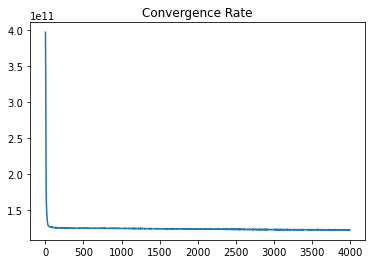

In [135]:
plt.title('Convergence Rate')
plt.plot(fitting_amff.history['loss'])
plt.show()

In [136]:
def generate_future_data(inp, days_to_get):
    prep_future_data_simple = (np.arange(0, days_to_get + 1) + inp[-1]).reshape(-1,1)
    generated_future_data = poly_reg.transform(prep_future_data_simple)
    scaled_gen_future_data = scx.transform(generated_future_data[:,1:])
    # Generating Dates
    lastDate = inputData_dates[inp[-1]]
    futureDates = [datetime.strptime(lastDate, '%d/%m/%y').date()]
    for i in range(days_to_get):
        futureDates.append(futureDates[-1] + timedelta(days=1))
    futureDates = [x.strftime('%d/%m/%y') for x in futureDates]
    
    return generated_future_data, scaled_gen_future_data, futureDates

In [137]:
ann_future_model_prediction_on_training = ann_model_for_future.predict(input_data_tf)

In [138]:
future_data, scaled_future_data, future_dates = generate_future_data(input_data[:,1], 7)
all_cases_future = ann_model_for_future.predict(scaled_future_data)

In [139]:
ann_model_for_future_customize = ann_model_for_future.customize()
ann_model_for_future_customize.evaluate(input_data_tf, output_data_tf)

22/22 [==============================] - 0s 2ms/step - loss: 122850852864.0000 - mean_absolute_error: 261556.6406


[122850852864.0, 261556.640625]

In [140]:
pd.DataFrame(all_cases_future, index = future_dates, columns = ['Confirmed', 'Deaths', 'Recoveries'])

,Confirmed,Deaths,Recoveries
02/10/22,794729.1250,17671.728516,723793.4375
03/10/22,798960.5000,17758.527344,727647.8750
04/10/22,803279.9375,17847.271484,731582.2500
05/10/22,807662.9375,17937.388672,735574.9375
06/10/22,812106.3125,18028.812500,739622.5000
07/10/22,816662.5000,18122.621094,743772.3750
08/10/22,821462.6250,18220.263672,748143.7500
09/10/22,826368.6250,18319.443359,752611.4375


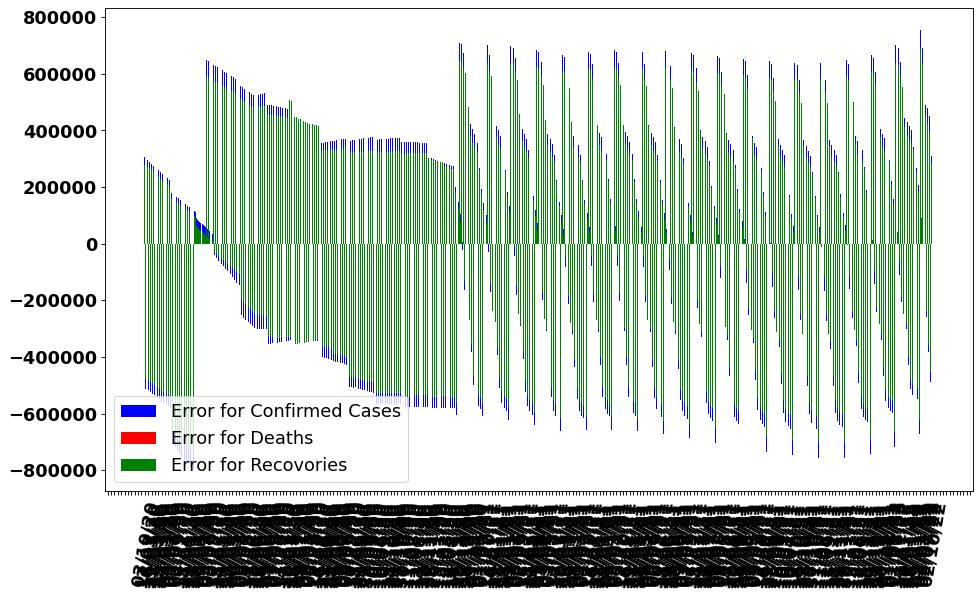

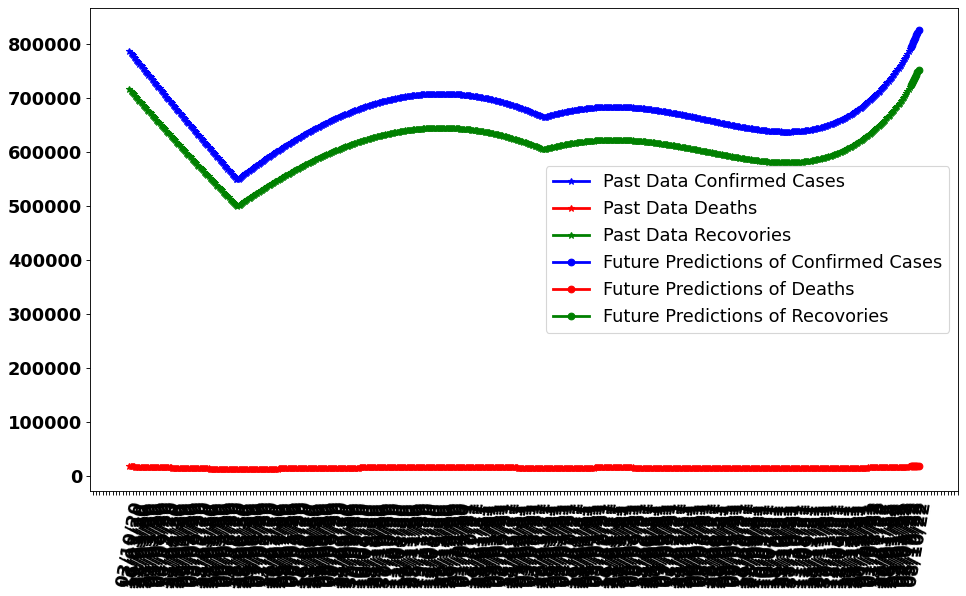

In [142]:
# plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=16)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates, output_data_tf[:,0], 'b', output_data_tf[:,1], 'r', output_data_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates, 
#          ann_future_model_prediction_on_training[:,0], '*b', 
#          ann_future_model_prediction_on_training[:,1], '*r', 
#          ann_future_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], fontsize=16)
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# plt.show()

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates,(ann_future_model_prediction_on_training[:,0].reshape(-1,) - output_data_tf[:,0]), color = 'b')
plt.bar(dates,(ann_future_model_prediction_on_training[:,1].reshape(-1,) - output_data_tf[:,1]), color = 'r')
plt.bar(dates,(ann_future_model_prediction_on_training[:,2].reshape(-1,) - output_data_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()


figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '-*b', 
         ann_future_model_prediction_on_training[:,1], '-*r', 
         ann_future_model_prediction_on_training[:,2], '-*g',
         future_dates, all_cases_future[:,0], '-ob', 
         future_dates, all_cases_future[:,1], '-or', 
         future_dates, all_cases_future[:,2], '-og', 
         linewidth = 2.5)
plt.legend(['Past Data Confirmed Cases', 'Past Data Deaths','Past Data Recovories', 'Future Predictions of Confirmed Cases', 
            'Future Predictions of Deaths','Future Predictions of Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()